In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
import pandas as pd
from google.colab import files

# Step 1: Upload the file from your local machine
uploaded = files.upload()

# Step 2: Confirm the name of the uploaded file and read it into a pandas DataFrame
# Assuming the file name is 'diabetes_binary_health_indicators_BRFSS2015.csv'
# You can change the file name accordingly if it's different
data = pd.read_csv('diabetes_binary.csv', sep=',', encoding='utf-8')

# Step 3: Store a copy of the original data
Original_data = data.copy()




Saving diabetes_binary.csv to diabetes_binary (2).csv


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
columns_to_convert = [
    "Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump",
    "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
    "Sex", "Age", "Education", "Income"
]

for column in columns_to_convert:
    data[column] = data[column].astype(int)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [7]:
# df.shape
print(f"Num rows: {len(data)}")
print(f"Num columns: {len(data.columns)}")

Num rows: 253680
Num columns: 22


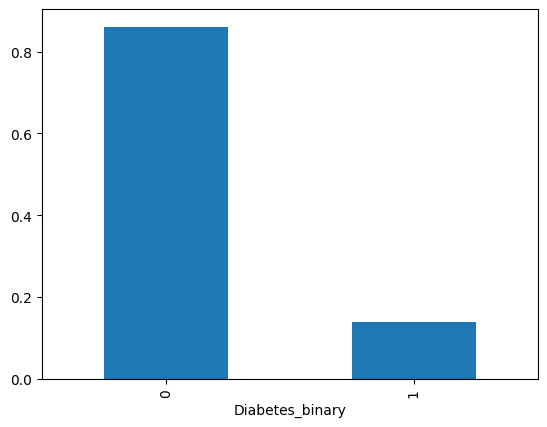

In [8]:
data['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar');

In [9]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
data.isnull().sum()


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
data.isnull().sum().any()

False

# There is no mising data


In [13]:
data.duplicated().sum()

24206

In [14]:
data.loc[data.duplicated(),:]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1,1,1,1,27,1,0,0,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1,1,1,1,33,0,0,0,1,1,...,1,0,3,0,0,0,1,9,6,6
253550,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,7,6,8
253563,0,0,1,1,24,1,0,0,1,1,...,1,0,2,0,0,0,1,8,6,8
253597,0,0,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8


In [15]:
data.drop_duplicates(inplace=True)

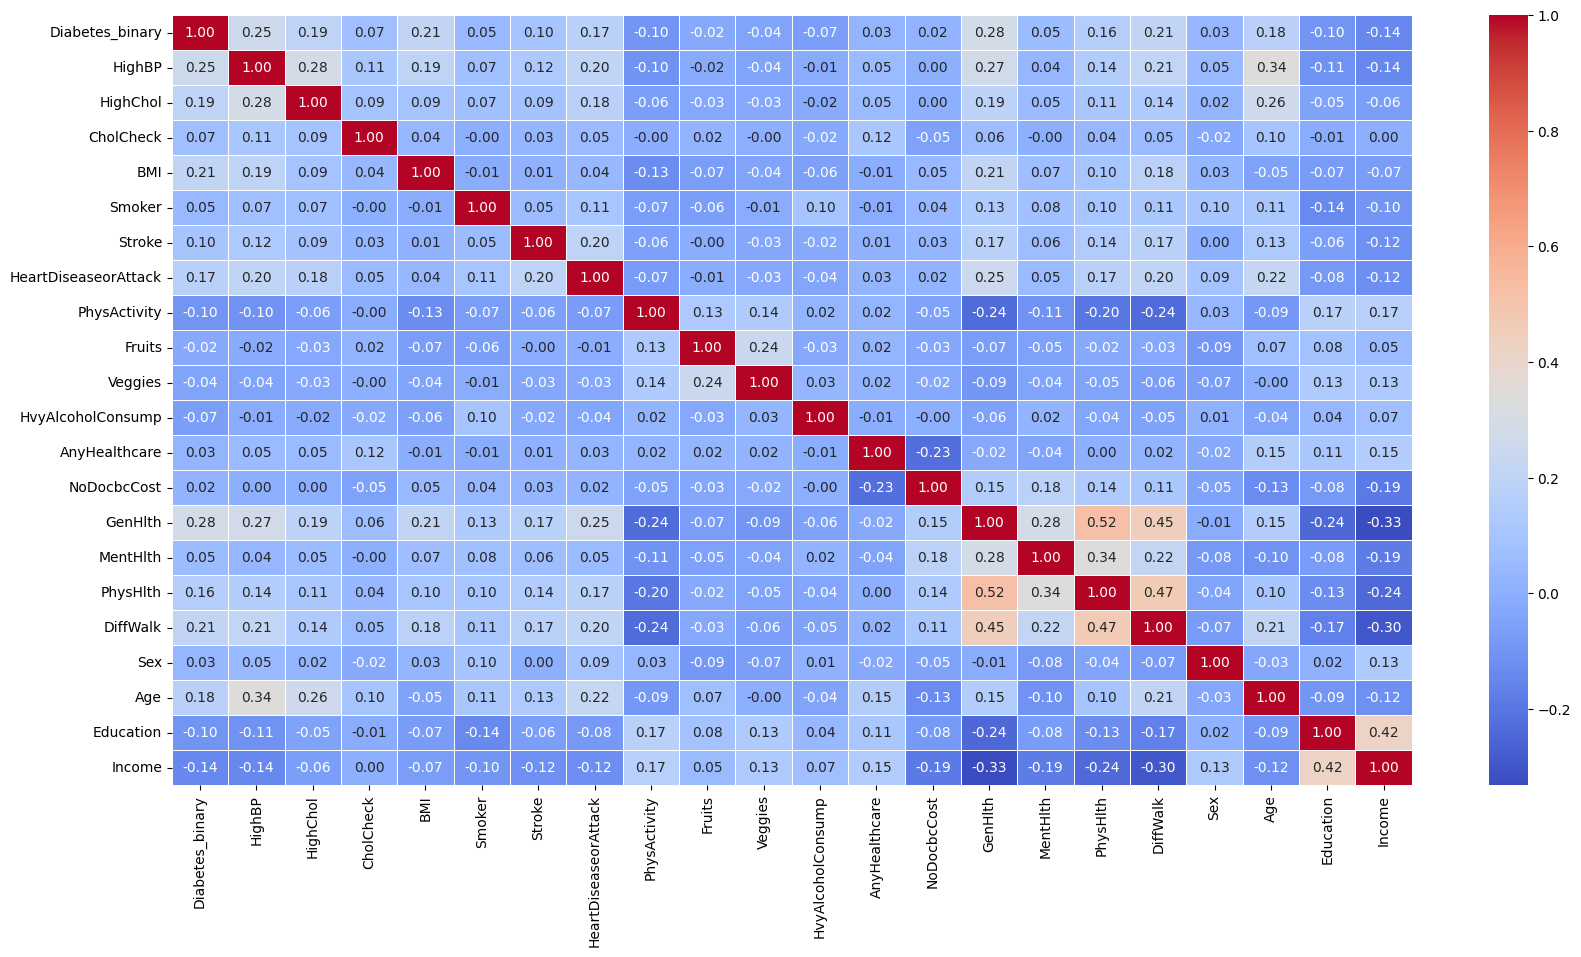

In [16]:

plt.figure(figsize=(20, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

plt.show()


In [17]:
df_vis=data.copy()

In [18]:


transformations = {
    'Diabetes_binary': {0: 'No Diabetes', 1: 'Pre Diabetes', 2: 'Diabetes'},
    'HighBP': {0: 'No High', 1: 'High BP'},
    'HighChol': {0: 'No High Cholesterol', 1: 'High Cholesterol'},
    'CholCheck': {0: 'No Cholesterol Check in 5 Years', 1: 'Cholesterol Check in 5 Years'},
    'Smoker': {0: 'No', 1: 'Yes'},
    'Stroke': {0: 'No', 1: 'Yes'},
    'HeartDiseaseorAttack': {0: 'No', 1: 'Yes'},
    'PhysActivity': {0: 'No', 1: 'Yes'},
    'Fruits': {0: 'No', 1: 'Yes'},
    'Veggies': {0: 'No', 1: 'Yes'},
    'HvyAlcoholConsump': {0: 'No', 1: 'Yes'},
    'AnyHealthcare': {0: 'No', 1: 'Yes'},
    'NoDocbcCost': {0: 'No', 1: 'Yes'},
    'GenHlth': {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'},
    'DiffWalk': {0: 'No', 1: 'Yes'},
    'Sex': {0: 'Female', 1: 'Male'},
    'Education': {
        1: 'Never Attended School', 2: 'Elementary', 3: 'Some high school',
        4: 'High school graduate', 5: 'Some college or technical school', 6: 'College graduate'
    },
    'Income': {
        1: 'Less Than $10,000', 2: 'Less Than $10,000', 3: 'Less Than $10,000',
        4: 'Less Than $10,000', 5: 'Less Than $35,000', 6: 'Less Than $35,000',
        7: 'Less Than $35,000', 8: '$75,000 or More'
    }
}

# Apply the transformations
for column, mapping in transformations.items():
    df_vis[column] = df_vis[column].replace(mapping)


# Visualizing Data

In [19]:
import pandas as pd

unique_values = df_vis.nunique()
unique_value_count_df = pd.DataFrame(unique_values, columns=['unique value count']).rename_axis('Column').reset_index()

print(unique_value_count_df)


                  Column  unique value count
0        Diabetes_binary                   2
1                 HighBP                   2
2               HighChol                   2
3              CholCheck                   2
4                    BMI                  84
5                 Smoker                   2
6                 Stroke                   2
7   HeartDiseaseorAttack                   2
8           PhysActivity                   2
9                 Fruits                   2
10               Veggies                   2
11     HvyAlcoholConsump                   2
12         AnyHealthcare                   2
13           NoDocbcCost                   2
14               GenHlth                   5
15              MentHlth                  31
16              PhysHlth                  31
17              DiffWalk                   2
18                   Sex                   2
19                   Age                  13
20             Education                   6
21        

In [20]:
cols = list(df_vis.columns)
cols_df=cols[1:]

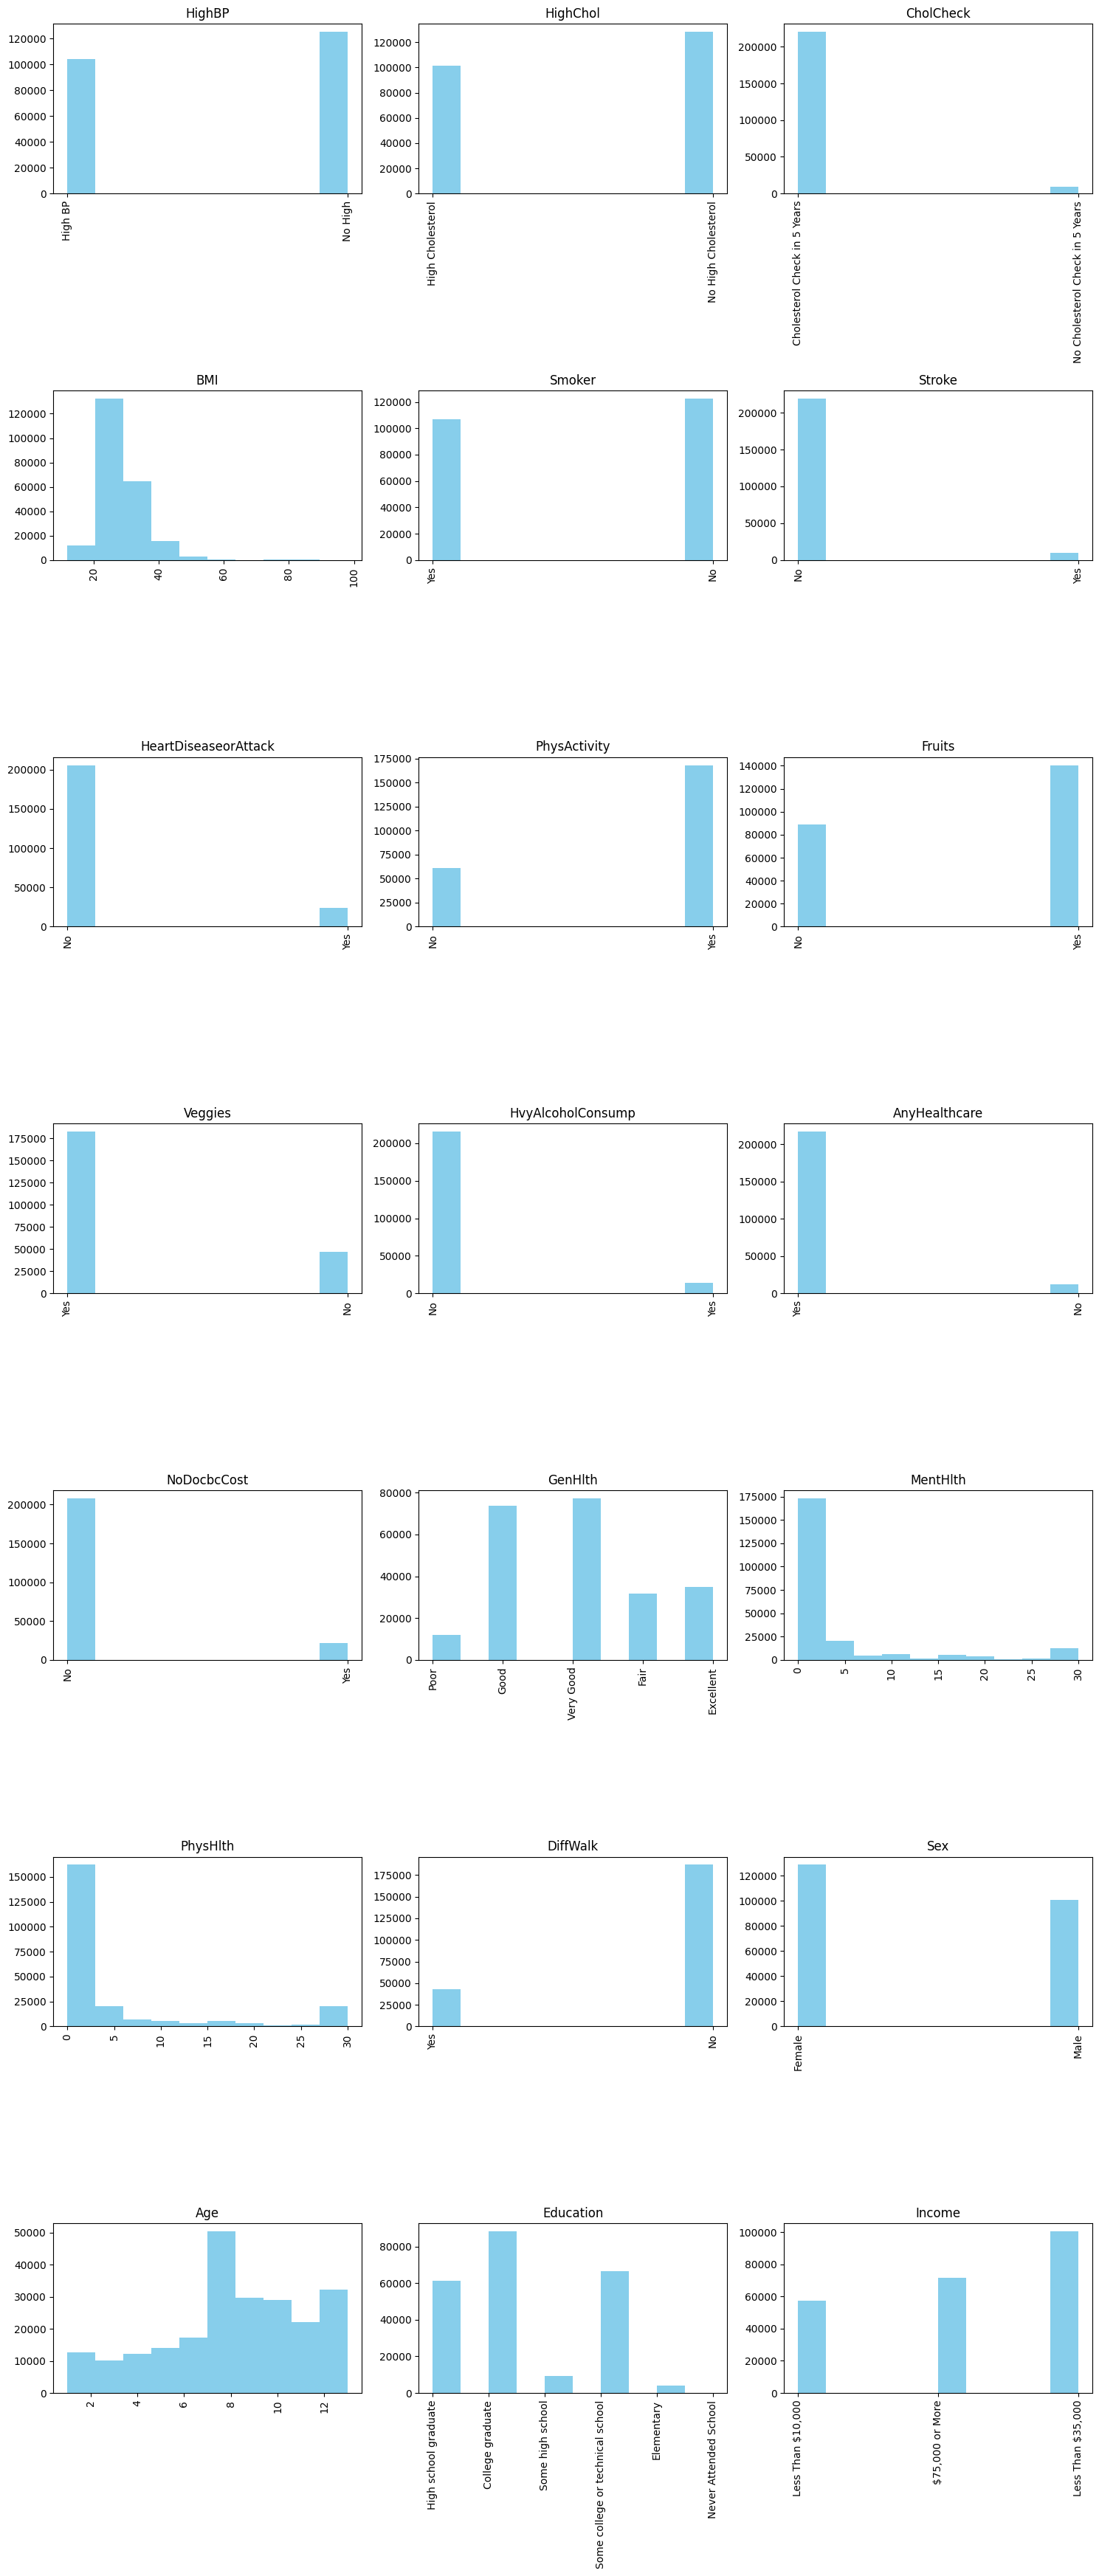

In [21]:
ncols = 3
nrows = (len(cols_df) + ncols - 1) // ncols

plt.figure(figsize=(15, 5 * nrows))
for i, column in enumerate(cols_df):
    plt.subplot(nrows, ncols, i + 1)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.hist(df_vis[column], color='skyblue')

plt.tight_layout()
plt.show()

In [22]:
df_vis['Diabetes_binary'].value_counts()

Diabetes_binary
No Diabetes     194377
Pre Diabetes     35097
Name: count, dtype: int64

# correlation with Diabetes_Binary through bar graph


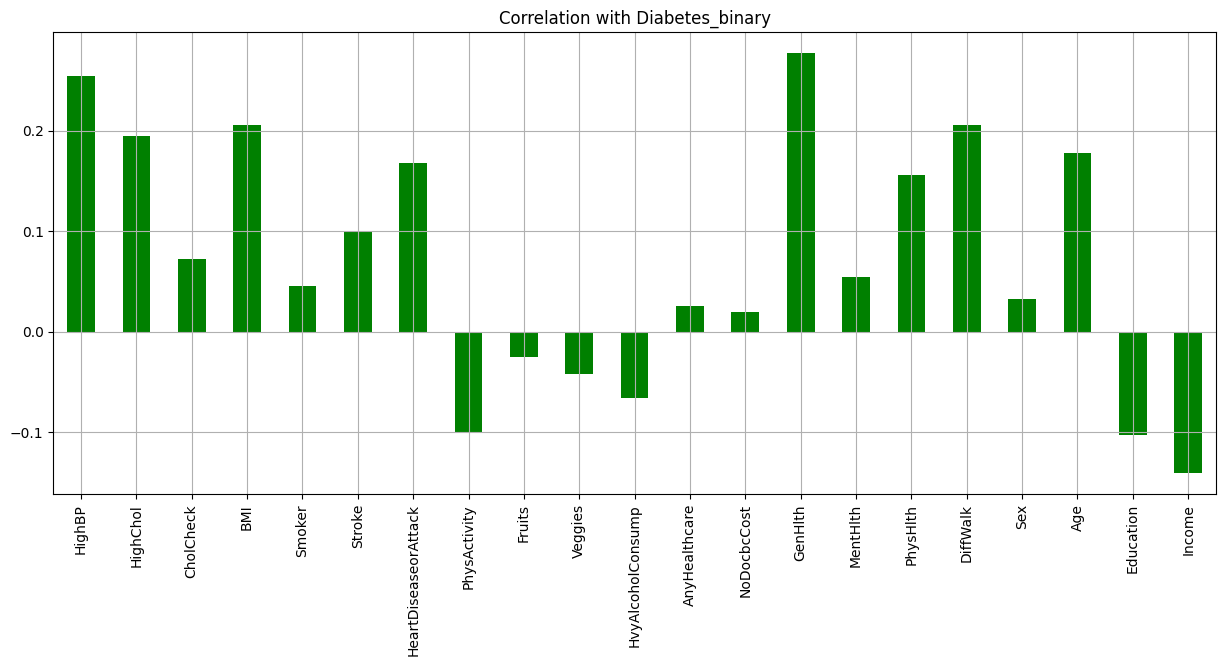

In [23]:

correlation_with_diabetes = data.drop(columns='Diabetes_binary').corrwith(data['Diabetes_binary'])

plt.figure(figsize=(15, 6))
correlation_with_diabetes.plot.bar(color='green', grid=True)
plt.title('Correlation with Diabetes_binary')
plt.show()


# Distribution of diabetes among genders


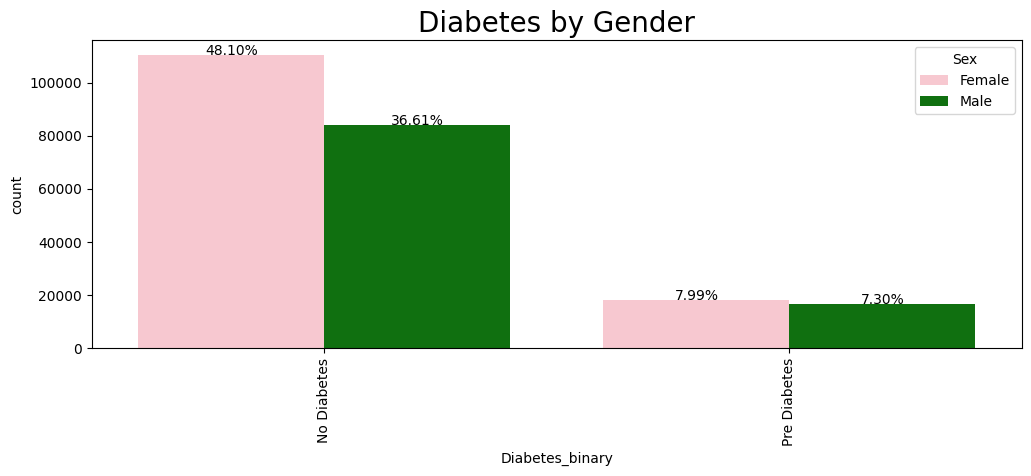

In [24]:
plt.figure(figsize=(12, 4))
palette_colors = {'Male': 'green', 'Female': 'pink'}
x = sns.countplot(x='Diabetes_binary', data=df_vis, hue='Sex', palette=palette_colors)
plt.xticks(rotation=90)
plt.title('Diabetes by Gender', fontdict={'fontsize': 20})
total = len(df_vis)
for p in x.patches:
    height = p.get_height()

    if height > 0:
        percentage = '{:.2f}%'.format((height / total) * 100)
        x.annotate(percentage, (p.get_x() + p.get_width() / 2., height + 0.01),
                   ha='center')
plt.show()

Gender has no effect to developing diabetes.


# Smoker

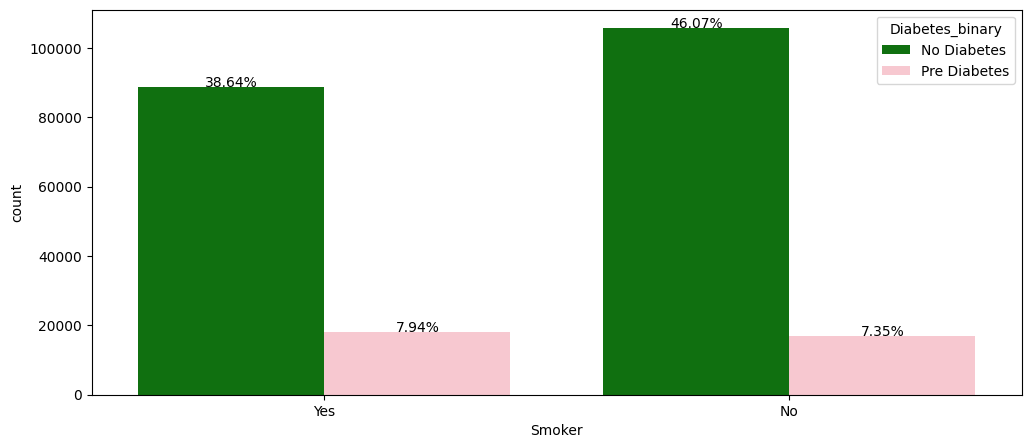

In [25]:
plt.figure(figsize=(12, 5))


palette_colors = ['green', 'pink']
x = sns.countplot(x='Smoker', hue='Diabetes_binary', data=df_vis, palette=palette_colors)
total = len(df_vis)
for p in x.patches:
    height = p.get_height()

    if height > 0:
        percentage = '{:.2f}%'.format((height / total) * 100)

        x.annotate(percentage, (p.get_x() + p.get_width() / 2, height + 0.01), ha='center')

plt.show()


# HvyAlcoholConsump

In [26]:
df_vis['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
No     215524
Yes     13950
Name: count, dtype: int64

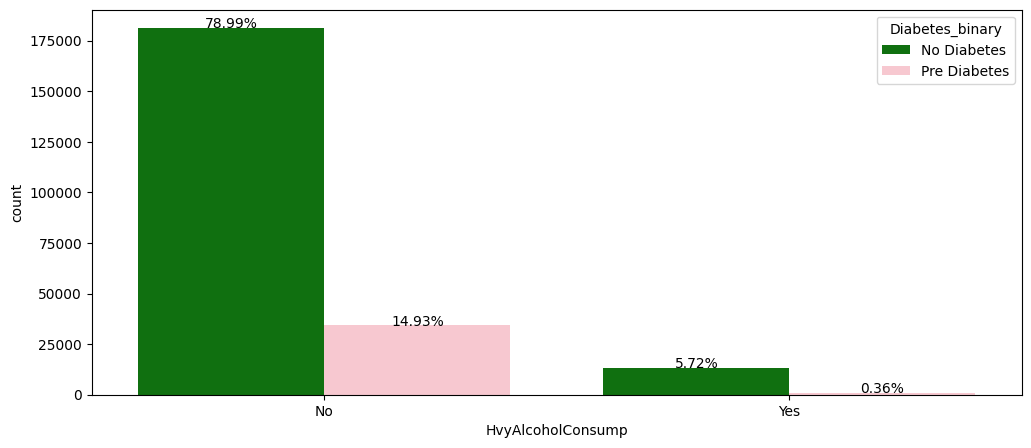

In [27]:
plt.figure(figsize=(12, 5))
palette_colors = ['green', 'pink']
x = sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_binary', data=df_vis, palette=palette_colors)
total = len(df_vis)
for p in x.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.2f}%'.format((height / total) * 100)
        x.annotate(percentage, (p.get_x() + p.get_width() / 2., height + 0.01), ha='center')
plt.show()

# Smoker and HvyAlcoholConsump's combined effect on Diabetes

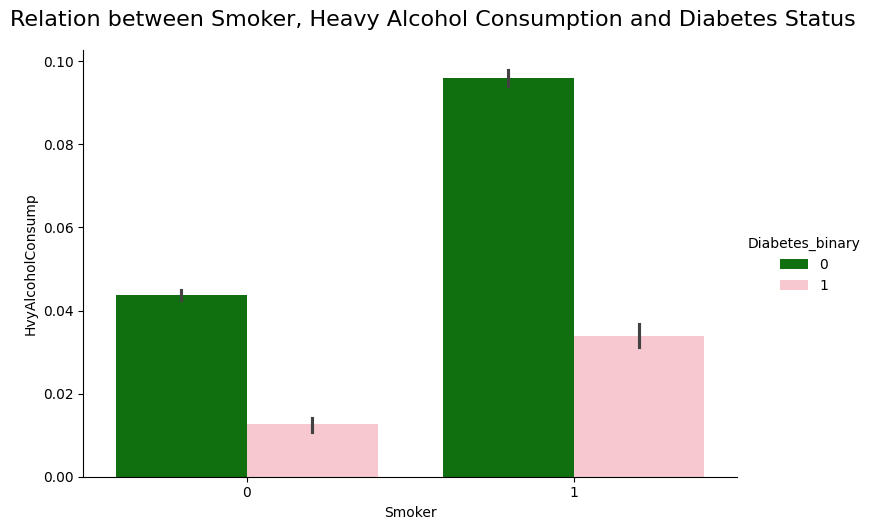

In [28]:
palette_colors = {0: 'green', 1: 'pink', 2: 'purple'}
g = sns.catplot(
    x="Smoker",
    y="HvyAlcoholConsump",
    hue="Diabetes_binary",
    data=data,
    kind="bar",
    palette=palette_colors,
    height=5,
    aspect=1.5
)

g.fig.suptitle("Relation between Smoker, Heavy Alcohol Consumption and Diabetes Status", fontsize=16, y=1.05)
plt.show()

result: Acording to this data, smoking and HvyAlcoholConsump both togather increase the risk of diabetes.



# HeartDiseaseorAttack

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

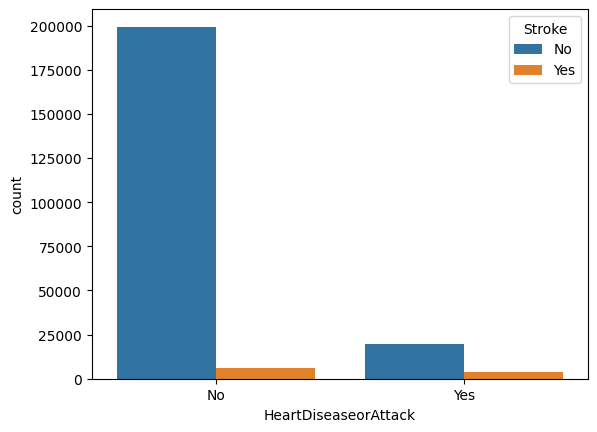

In [29]:
sns.countplot(data=df_vis,x='HeartDiseaseorAttack',hue='Stroke')

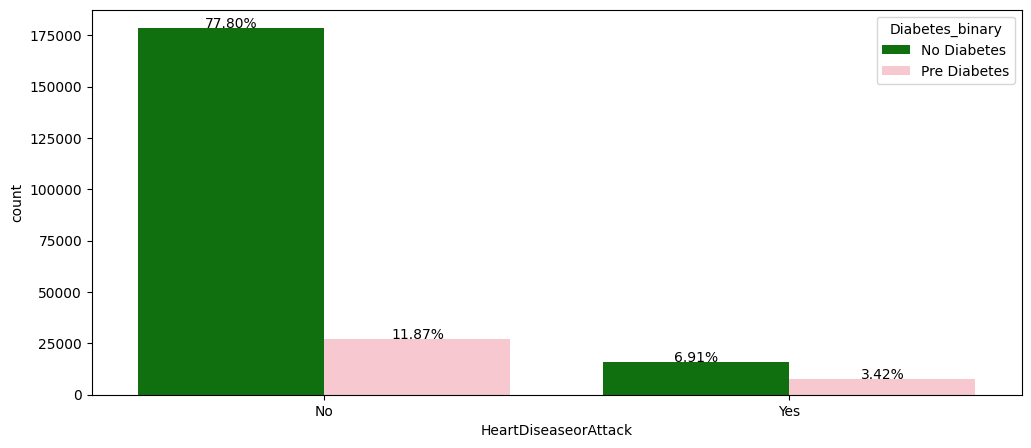

In [30]:

plt.figure(figsize=(12, 5))
palette_colors = ['green', 'pink']
x = sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_binary', data=df_vis, palette=palette_colors)
total = len(df_vis)
for p in x.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.2f}%'.format((height / total) * 100)
        x.annotate(percentage, (p.get_x() + p.get_width() / 2, height + 0.01), ha='center')

plt.show()

The chance of diabetes increases as the person has Heart Disease or Attack

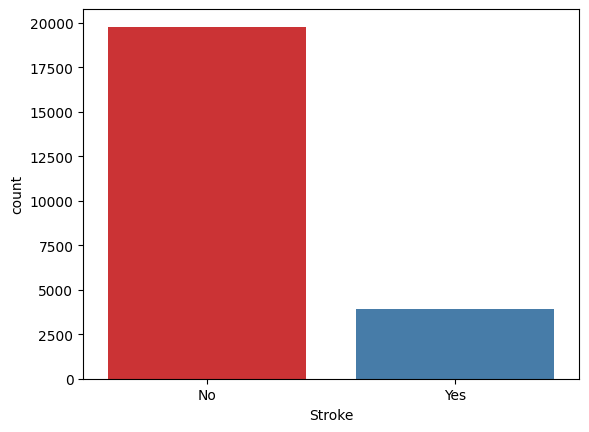

In [31]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df_vis[df_vis['HeartDiseaseorAttack']=="Yes"],x='Stroke',palette='Set1');

It is normal that if the person have heart disease or attack it causes to have stroke

# Stroke and HeartDiseaseorAttack's combined effect on Diabetes


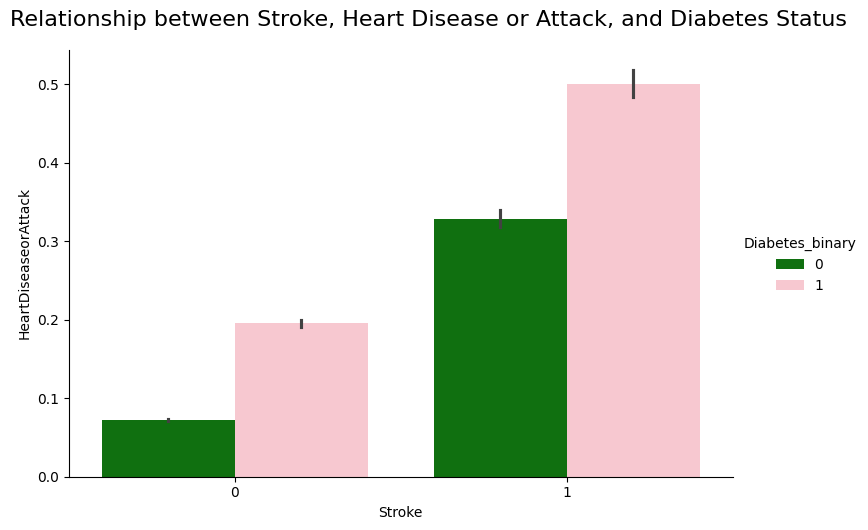

In [32]:

palette_colors = {0: 'green', 1: 'pink', 2: 'purple'}
cat_plot = sns.catplot(
    x="Stroke",
    y="HeartDiseaseorAttack",
    hue="Diabetes_binary",
    data=data,
    kind="bar",
    palette=palette_colors,
    height=5,
    aspect=1.5
)

cat_plot.fig.suptitle("Relationship between Stroke, Heart Disease or Attack, and Diabetes Status", fontsize=16, y=1.05)
plt.show()

result: Acording to this data, stroke and heartDiseaseorAttack togather increases the risk of Diabetes

# High blood pressure

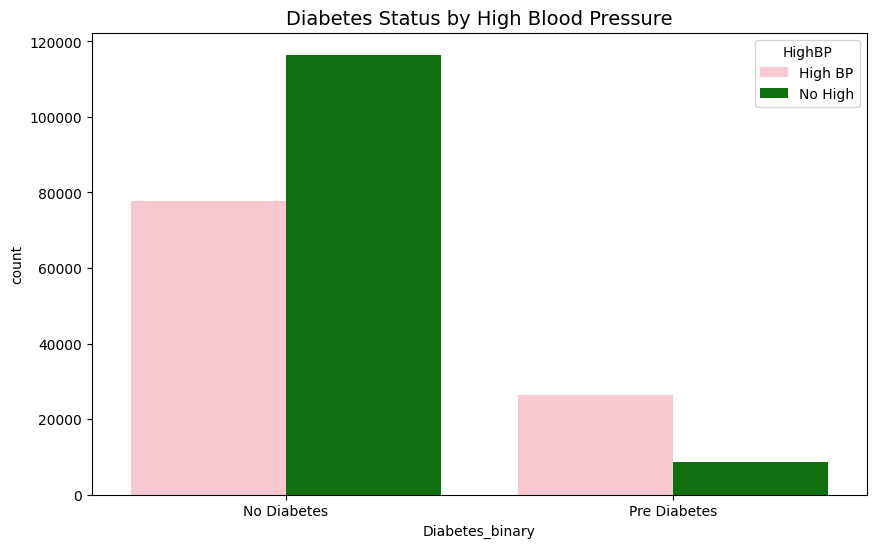

In [33]:
plt.figure(figsize=(10, 6))
palette_colors = {'No High': 'green', 'High BP': 'pink'}
sns.countplot(x='Diabetes_binary', hue='HighBP', data=df_vis, palette=palette_colors)
plt.title('Diabetes Status by High Blood Pressure', fontsize=14)

plt.show()

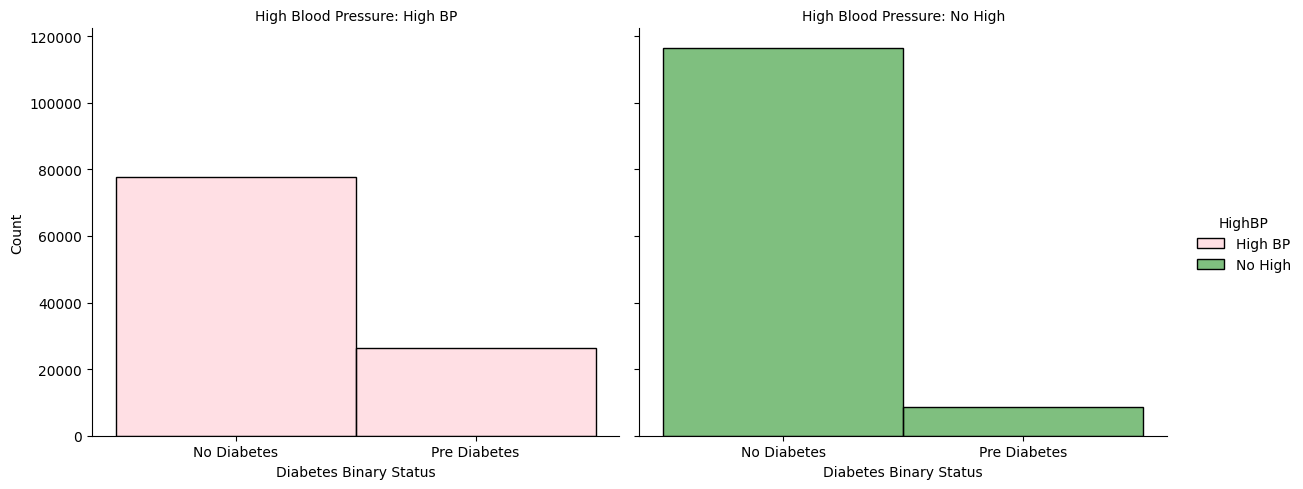

In [34]:
palette_colors = {'No High': 'green', 'High BP': 'pink'}


g = sns.displot(
    data=df_vis,
    x='Diabetes_binary',
    col='HighBP',
    kind='hist',
    hue='HighBP',
    palette=palette_colors,
    aspect=1.2
)

g.set_titles('High Blood Pressure: {col_name}')
g.set_axis_labels('Diabetes Binary Status', 'Count')
plt.show()

# high cholesterol

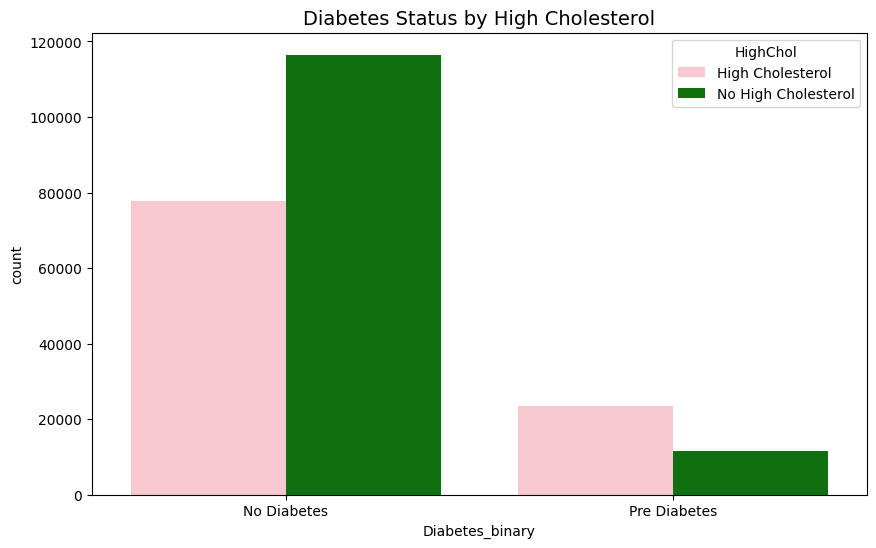

In [35]:
plt.figure(figsize=(10, 6))
palette_colors = {'No High Cholesterol': 'green', 'High Cholesterol': 'pink'}
sns.countplot(x='Diabetes_binary', hue='HighChol', data=df_vis, palette=palette_colors)
plt.title('Diabetes Status by High Cholesterol', fontsize=14)

plt.show()

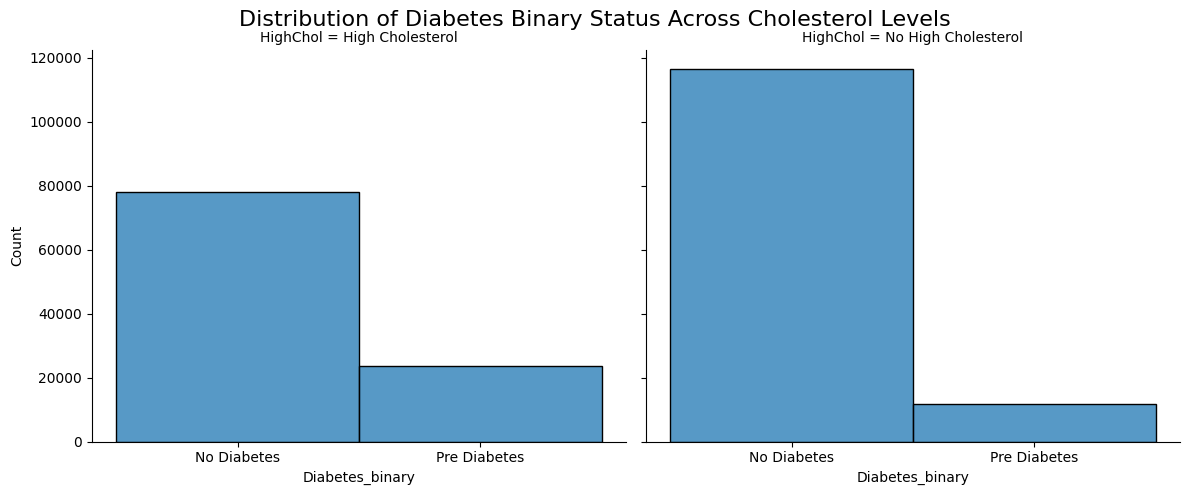

In [36]:
palette_colors = {'No High Cholesterol': 'green', 'High Cholesterol': 'pink'}
sns.displot(
    data=df_vis,
    x='Diabetes_binary',
    col='HighChol',
    kind='hist',
    palette=palette_colors,
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Diabetes Binary Status Across Cholesterol Levels', fontsize=16)
plt.show()

Most diabetics tend to have high blood pressure and cholesterol


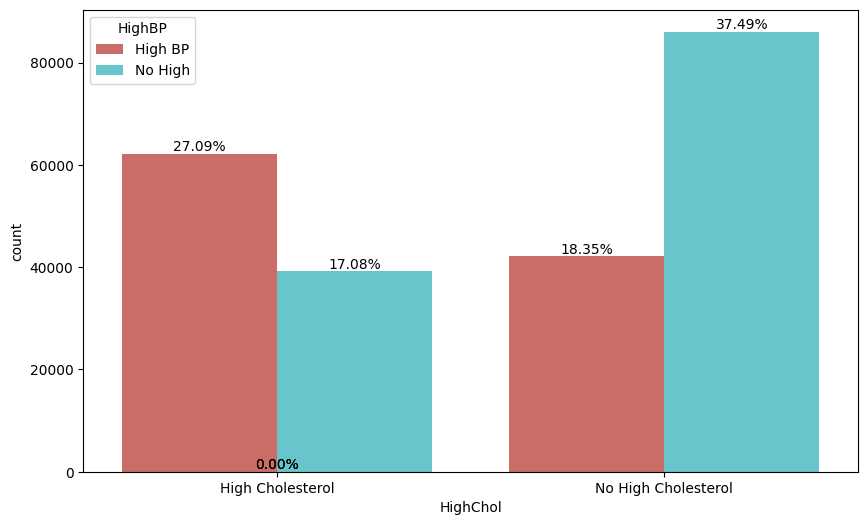

In [37]:

plt.figure(figsize=(10, 6))
palette_colors = sns.color_palette('hls', n_colors=len(df_vis['HighBP'].unique()))
ax = sns.countplot(x='HighChol', hue='HighBP', data=df_vis, palette=palette_colors)
for patch in ax.patches:
    height = patch.get_height()

    percentage = '{:.2f}%'.format(height / df_vis.shape[0] * 100)

    ax.annotate(percentage, (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')


plt.show()

# Checking HighBP and HighChol's combined effect on Diabetes


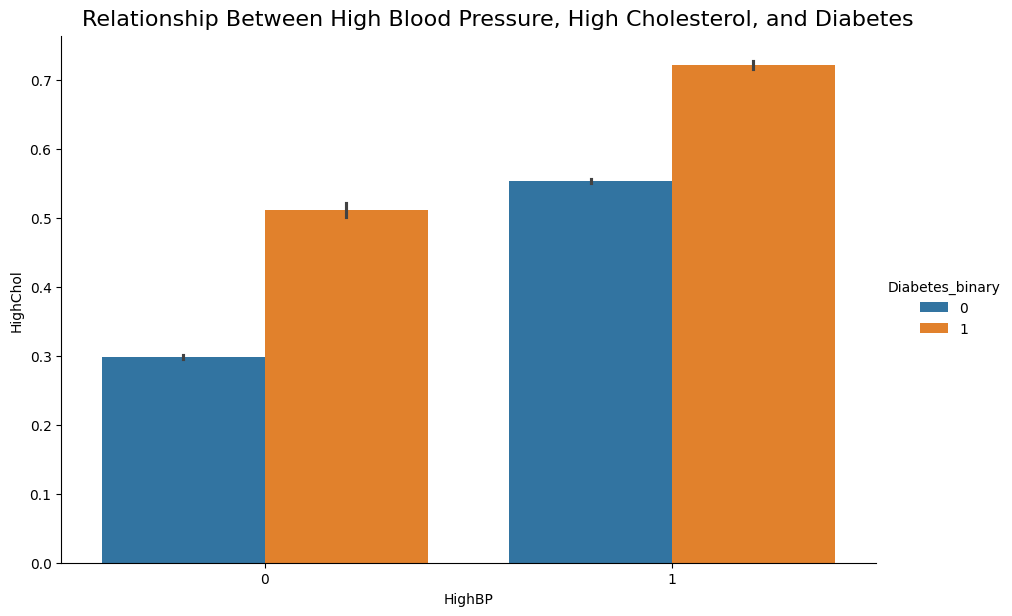

In [38]:

g = sns.catplot(
    x="HighBP",
    y="HighChol",
    hue="Diabetes_binary",
    data=data,
    kind="bar",
    height=6,
    aspect=1.5
)

g.fig.suptitle("Relationship Between High Blood Pressure, High Cholesterol, and Diabetes", fontsize=16, y=1.02)
plt.show()

result: Acording to this data, HighBP and HighChol both togather increase the risk of diabetes.



# BMI

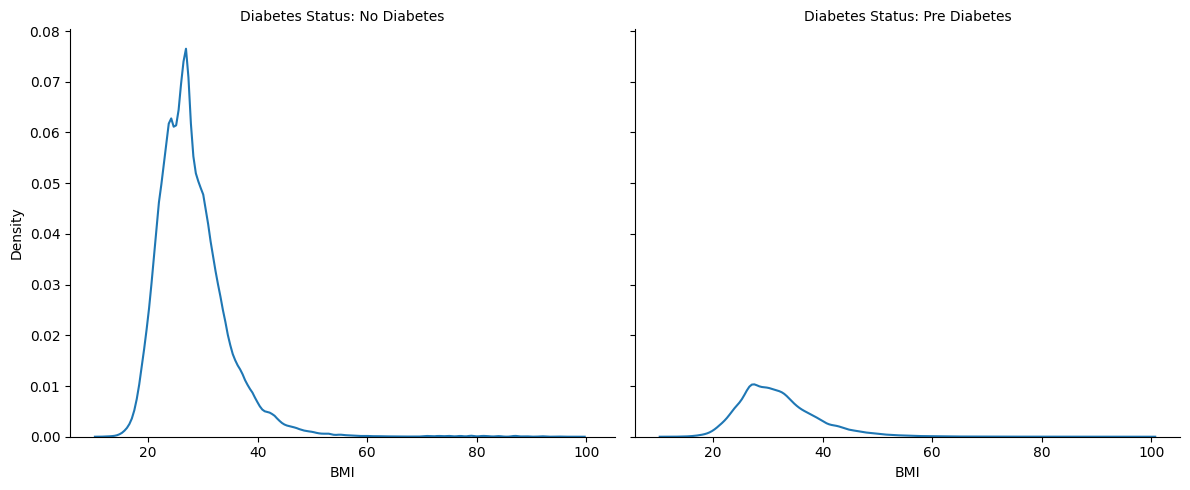

In [39]:
palette_colors = {0: 'green', 1: 'pink', 2: 'blue'}
g = sns.displot(
    data=df_vis,
    x='BMI',
    col='Diabetes_binary',
    kind="kde",
    palette=palette_colors,
    height=5,
    aspect=1.2
)

g.set_titles("Diabetes Status: {col_name}")
g.set_axis_labels("BMI", "Density")
plt.show()

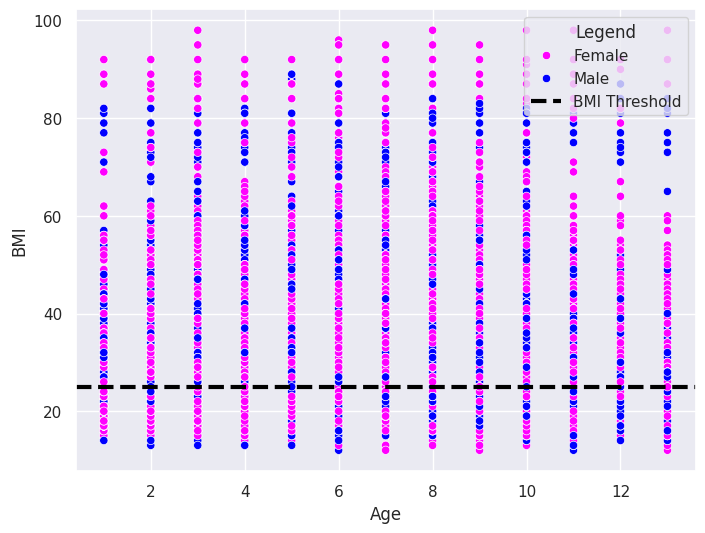

In [40]:

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x="Age", y="BMI", hue='Sex', data=df_vis, palette={'Male': 'blue', 'Female': 'magenta'})  # Specify custom colors for 'Sex'
ax.axhline(y=25, color='black', linestyle='--', linewidth=3, label='BMI Threshold')
plt.legend(title='Legend')
plt.show()

The BMI of the most peaople is more than the normal


# Split the BMI into (Underweight,Normal weight,Overweight,Obesity)


In [41]:
BMI=pd.cut( data['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [42]:
dd=pd.crosstab(df_vis['Diabetes_binary'],BMI,rownames=['Diabetes'])
dd=dd.astype(float)
dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
No Diabetes,2883.0,68285.0,69995.0,52976.0
Pre Diabetes,169.0,5350.0,11419.0,18118.0


In [43]:
Diabetes_sum_lst=list(dd.transpose().sum().values)
Diabetes_sum_lst

[194139.0, 35056.0]

In [44]:
for idx in range(dd.values.shape[0]):
    dd.values[idx]= dd.values[idx]/Diabetes_sum_lst[idx]*100

dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
No Diabetes,1.485018,35.173252,36.054064,27.287665
Pre Diabetes,0.482086,15.261296,32.573597,51.683021


<Figure size 1000x600 with 0 Axes>

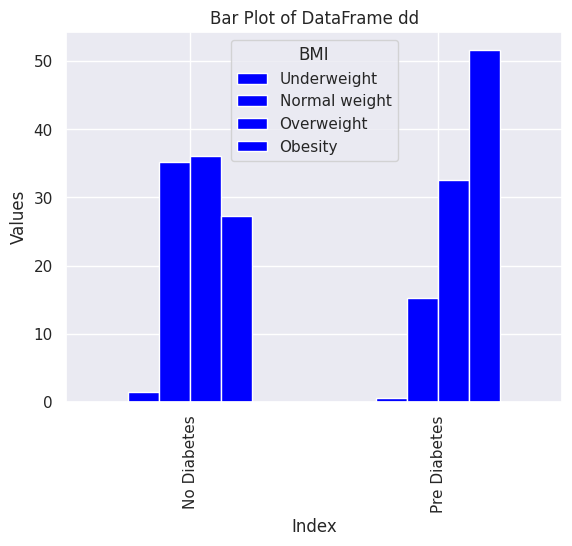

In [45]:
plt.figure(figsize=(10, 6))
dd.plot(kind='bar', color='blue')
plt.title('Bar Plot of DataFrame dd')
plt.xlabel('Index')
plt.ylabel('Values')
plt.grid(True)

plt.show()

# Age

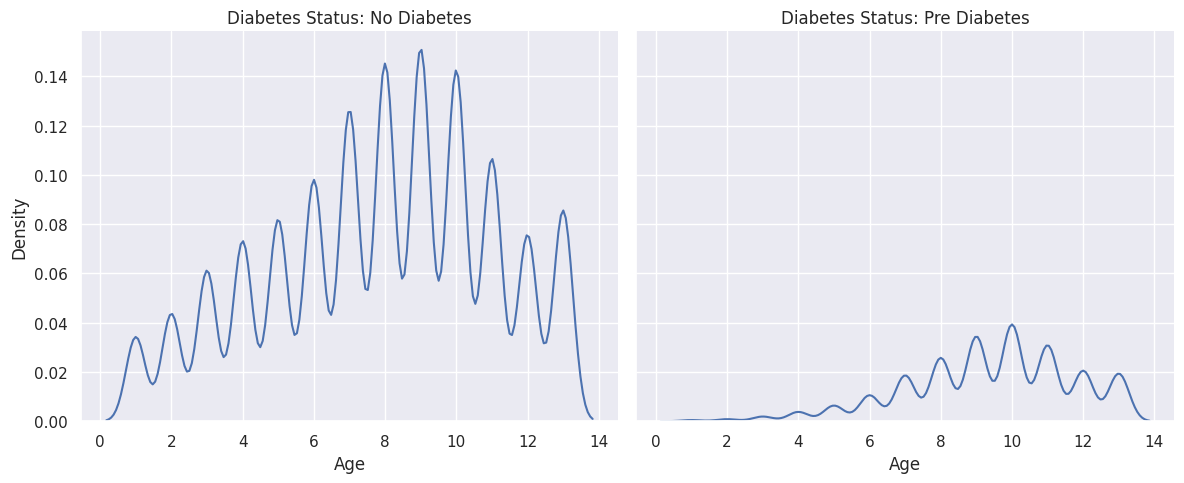

In [46]:
palette_colors = {0: 'green', 1: 'pink', 2: 'blue'}
g = sns.displot(
    data=df_vis,
    x='Age',
    col='Diabetes_binary',
    kind="kde",
    palette=palette_colors,
    height=5,
    aspect=1.2
)

g.set_titles("Diabetes Status: {col_name}")
g.set_axis_labels("Age", "Density")
plt.show()

In [47]:
age = pd.cut(df_vis['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 229474, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 1000x600 with 0 Axes>

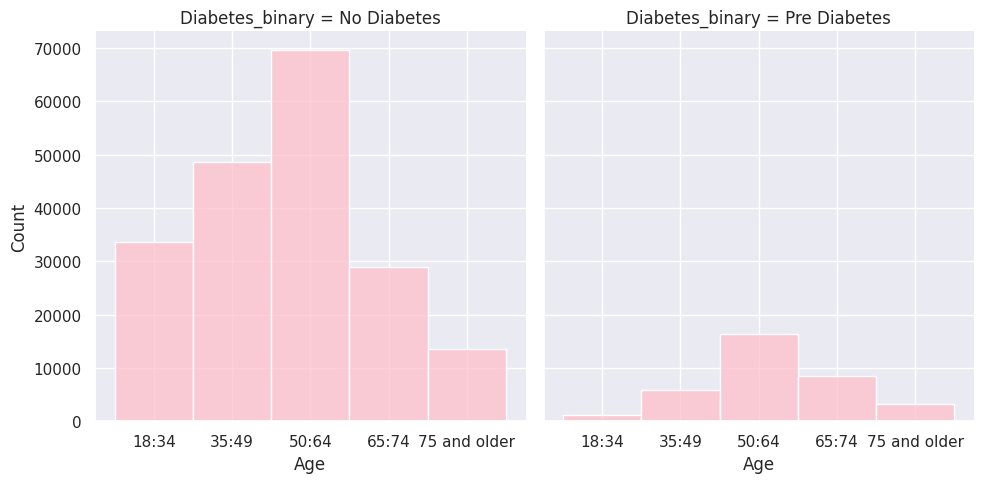

In [48]:
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,col='Diabetes_binary',x=age,color='pink');

people from 50 to 64 have higher chance to develop diabetes


# PhysHlth

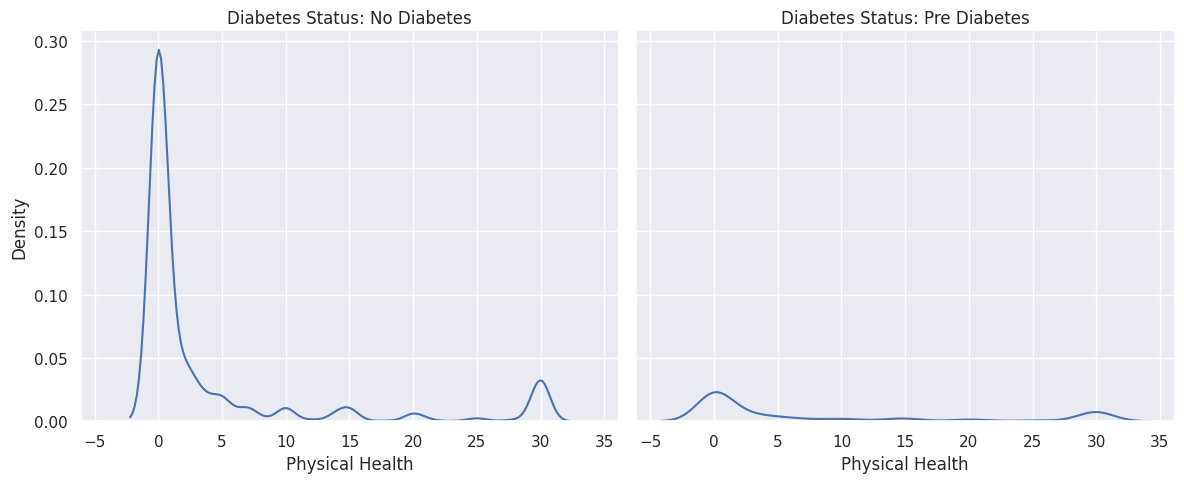

In [49]:
palette_colors = {0: 'green', 1: 'pink', 2: 'blue'}

g = sns.displot(
    data=df_vis,
    x='PhysHlth',
    col='Diabetes_binary',
    kind="kde",
    palette=palette_colors,
    height=5,
    aspect=1.2
)

g.set_titles("Diabetes Status: {col_name}")
g.set_axis_labels("Physical Health", "Density")
plt.show()

# MentHlth

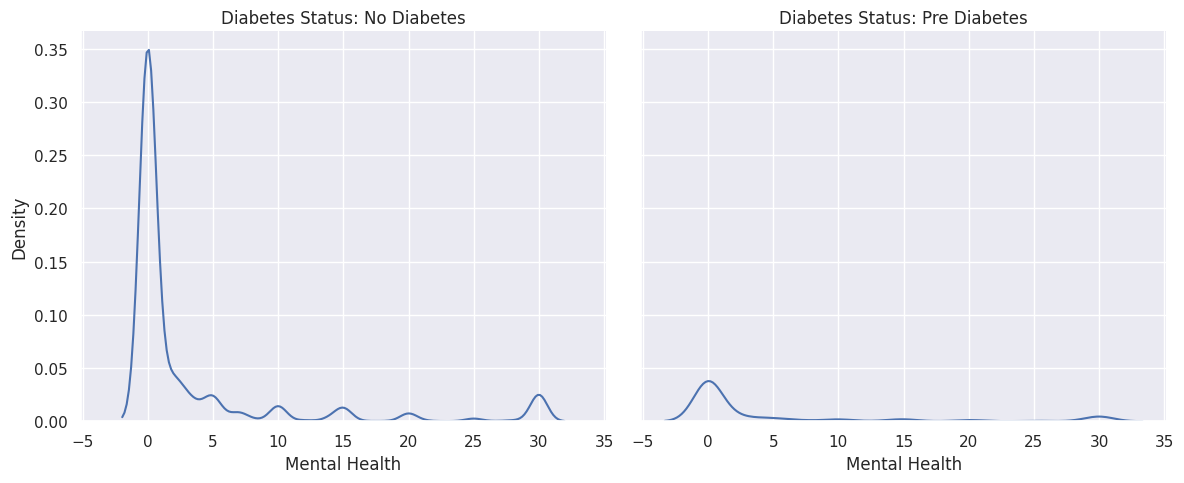

In [50]:
palette_colors = {0: 'green', 1: 'pink', 2: 'blue'}

g = sns.displot(
    data=df_vis,
    x='MentHlth',
    col='Diabetes_binary',
    kind="kde",
    palette=palette_colors,
    height=5,
    aspect=1.2
)

g.set_titles("Diabetes Status: {col_name}")
g.set_axis_labels("Mental Health", "Density")
plt.show()






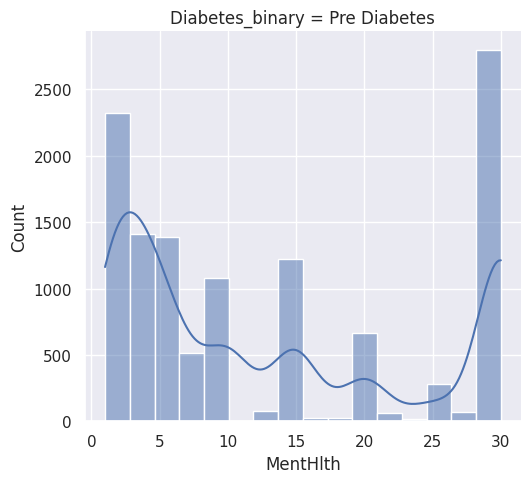

In [51]:
sns.displot(data=df_vis.loc[(df_vis['MentHlth']>0)&(df_vis['Diabetes_binary']!="No Diabetes")],x='MentHlth',col='Diabetes_binary',col_wrap=2,kde=True);

Mental health doesn't have effect on diabetes


# GenHlth

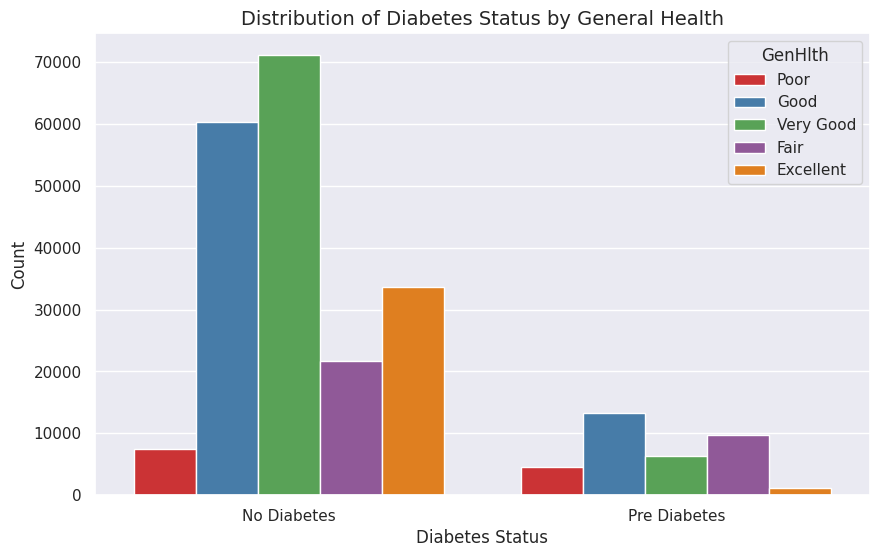

In [52]:
plt.figure(figsize=(10, 6))
palette_colors = sns.color_palette('Set1')
ax = sns.countplot(x='Diabetes_binary', hue='GenHlth', data=df_vis, palette=palette_colors)
ax.set_title('Distribution of Diabetes Status by General Health', fontsize=14)
ax.set_xlabel('Diabetes Status')
ax.set_ylabel('Count')
plt.show()

# Income

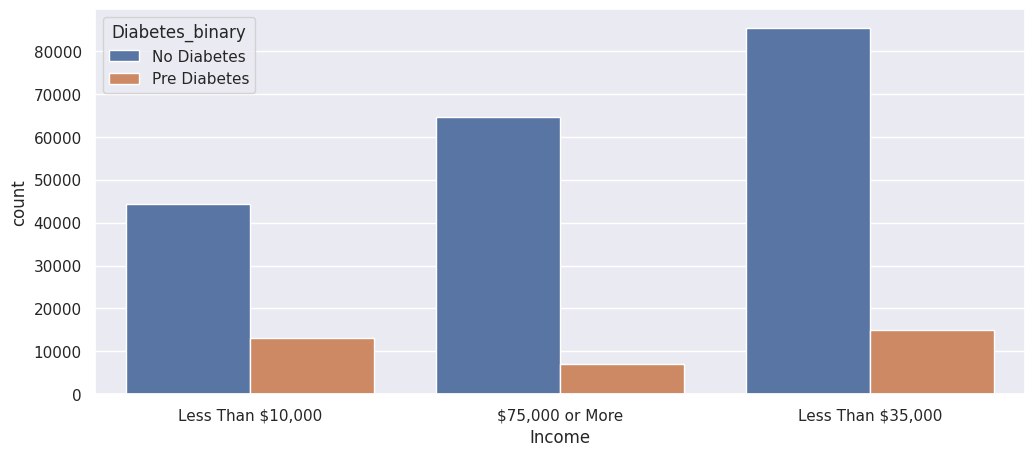

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Diabetes_binary' , data = df_vis)
plt.show()

<Figure size 1000x600 with 0 Axes>

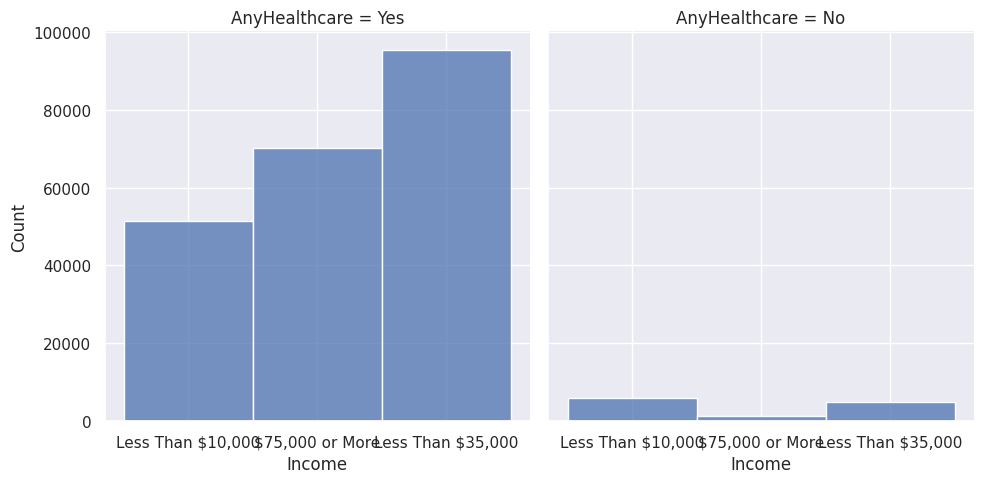

In [54]:
# The effect of the income on the healthcare
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,x='Income',col='AnyHealthcare');

If the person has more income he/she will has good healthcare


# Education

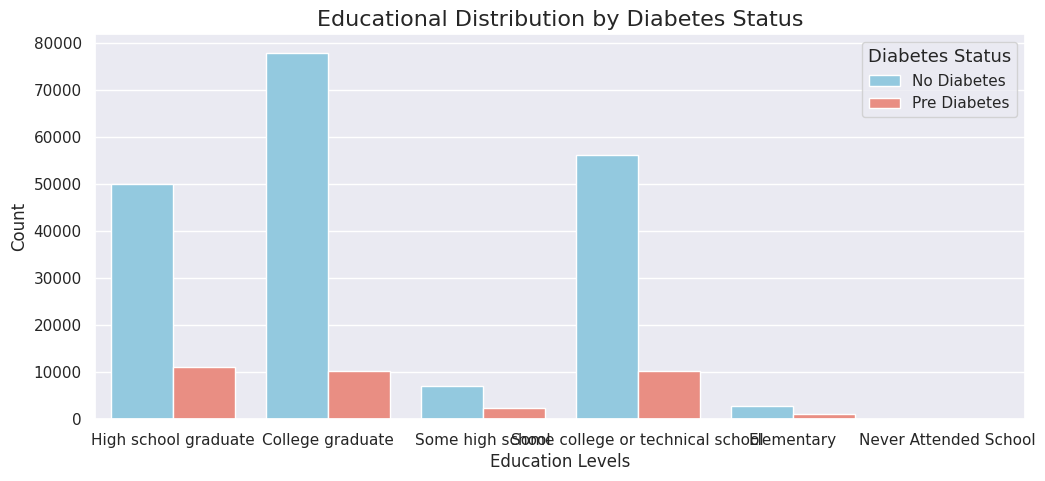

In [55]:
plt.figure(figsize=(12, 5))
palette_colors = {'No Diabetes': 'skyblue', 'Pre Diabetes': 'salmon', 'Diabetes': 'limegreen'}
ax = sns.countplot(x='Education', hue='Diabetes_binary', data=df_vis, palette=palette_colors)
ax.set_title('Educational Distribution by Diabetes Status', fontsize=16)
ax.set_xlabel('Education Levels', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Diabetes Status', title_fontsize='13', fontsize='11')
plt.show()

# Veggies

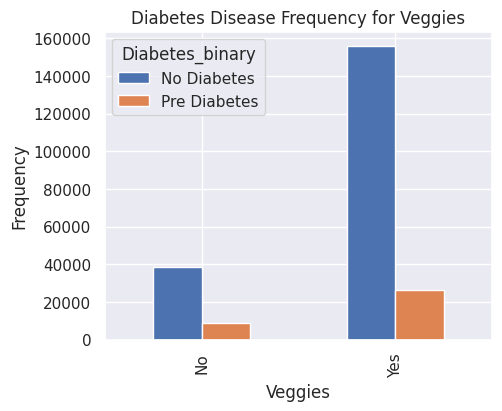

In [56]:
pd.crosstab(df_vis.Veggies,df_vis.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

# Fruits

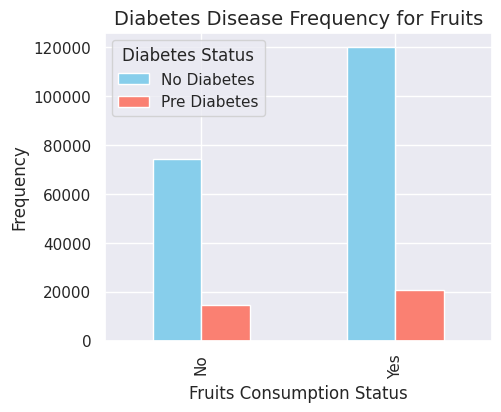

In [57]:
ctab = pd.crosstab(df_vis['Fruits'], df_vis['Diabetes_binary'])
ax = ctab.plot(kind='bar', figsize=(5, 4), color=['skyblue', 'salmon', 'limegreen'])
ax.set_title('Diabetes Disease Frequency for Fruits', fontsize=14)
ax.set_xlabel('Fruits Consumption Status', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre Diabetes', 'Diabetes'])

plt.show()

# PhysActivity

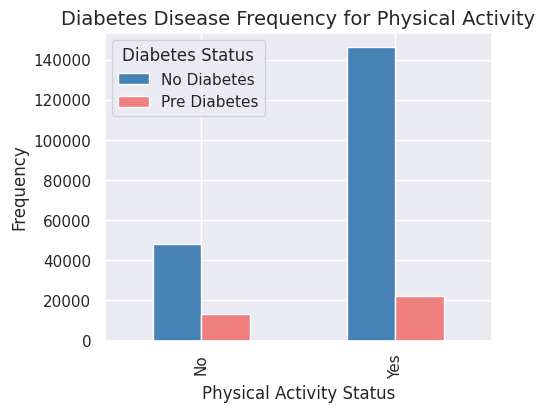

In [58]:
ctab = pd.crosstab(df_vis['PhysActivity'], df_vis['Diabetes_binary'])
fig, ax = plt.subplots(figsize=(5, 4))
ctab.plot(kind='bar', ax=ax, color=['steelblue', 'lightcoral', 'mediumseagreen'])
ax.set_title('Diabetes Disease Frequency for Physical Activity', fontsize=14)
ax.set_xlabel('Physical Activity Status', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

ax.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre Diabetes', 'Diabetes'])

plt.show()

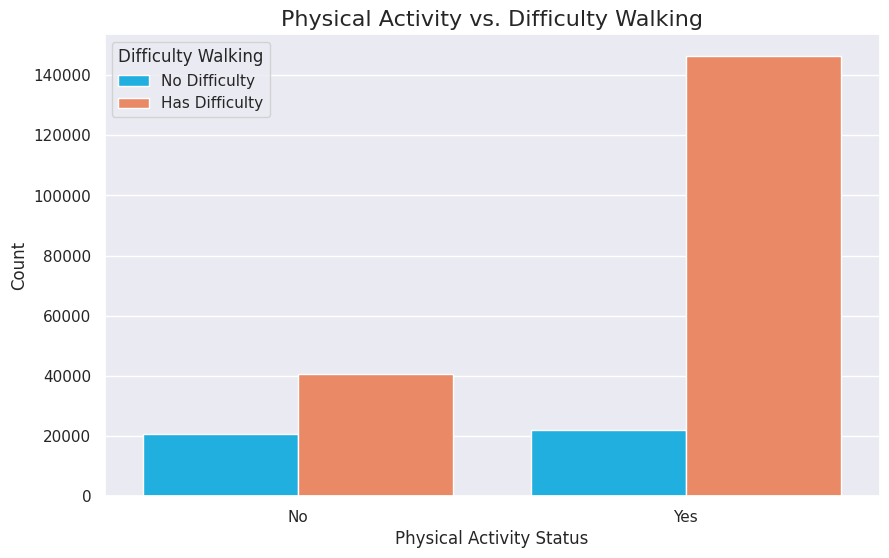

In [59]:

plt.figure(figsize=(10, 6))
palette_colors = ['deepskyblue', 'coral']
ax = sns.countplot(x='PhysActivity', hue='DiffWalk', data=df_vis, palette=palette_colors)
ax.set_title('Physical Activity vs. Difficulty Walking', fontsize=16)
ax.set_xlabel('Physical Activity Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Difficulty Walking', labels=['No Difficulty', 'Has Difficulty'])

plt.show()

# Preprocessing

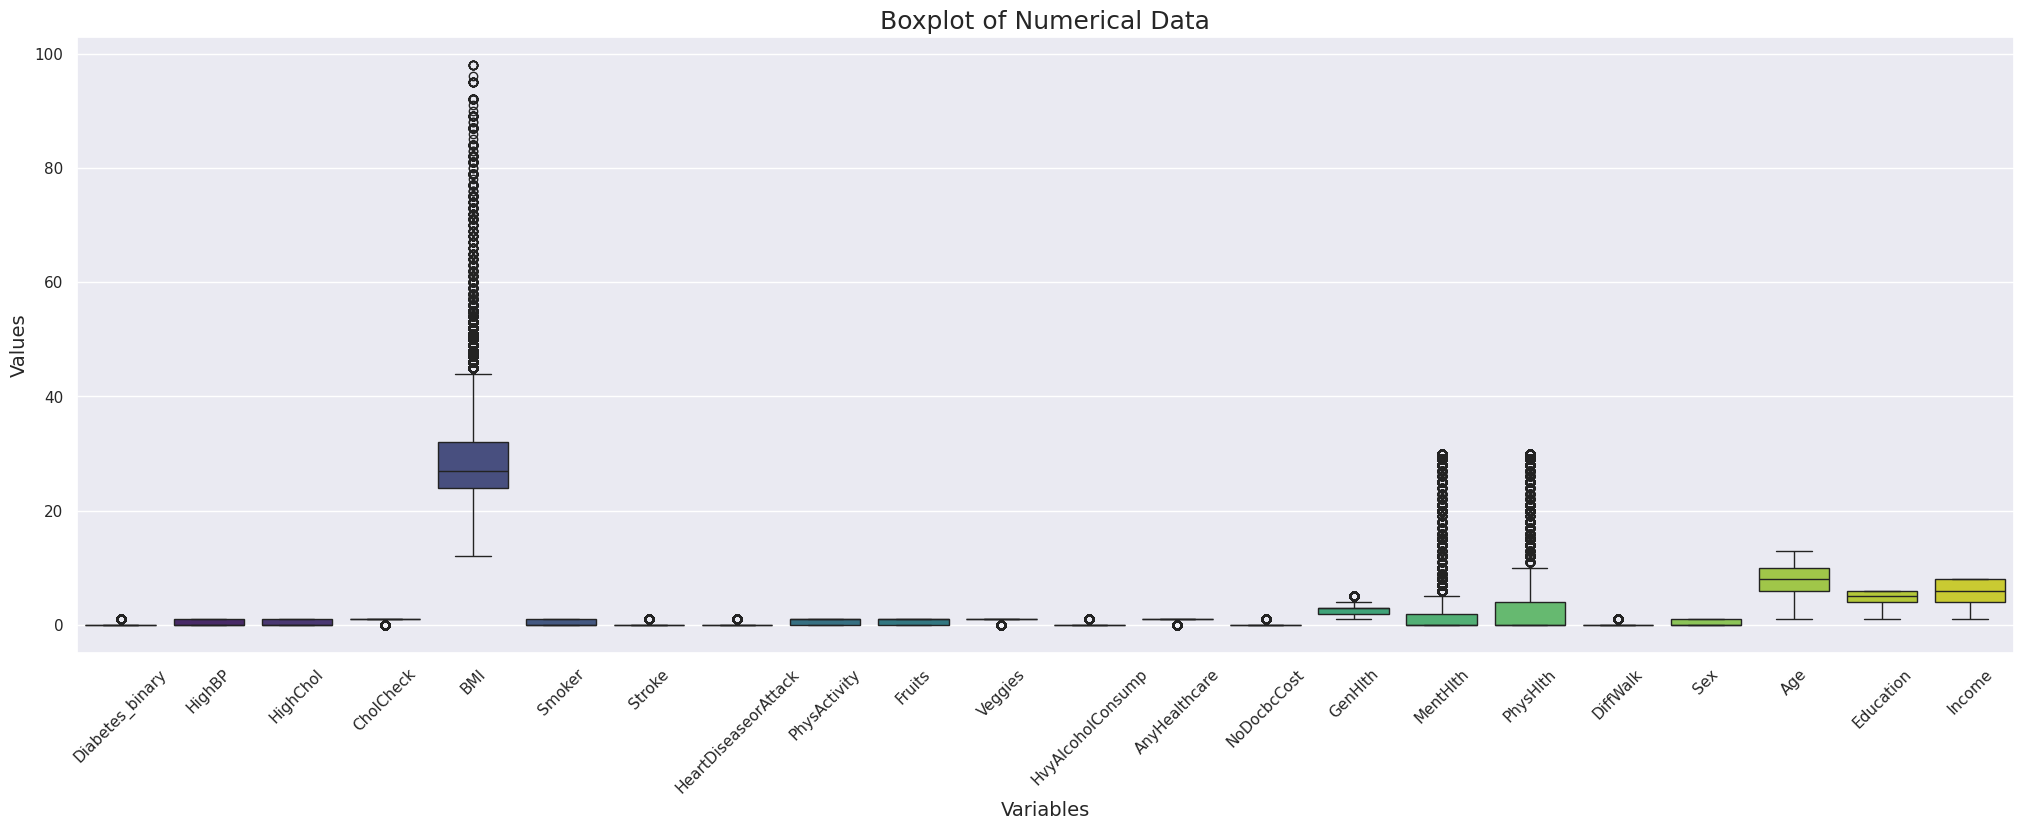

In [60]:
plt.figure(figsize=(25, 8))

palette_colors = 'viridis'
ax = sns.boxplot(data=data, palette=palette_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Boxplot of Numerical Data', fontsize=18)
ax.set_xlabel('Variables', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
plt.show()

In [61]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

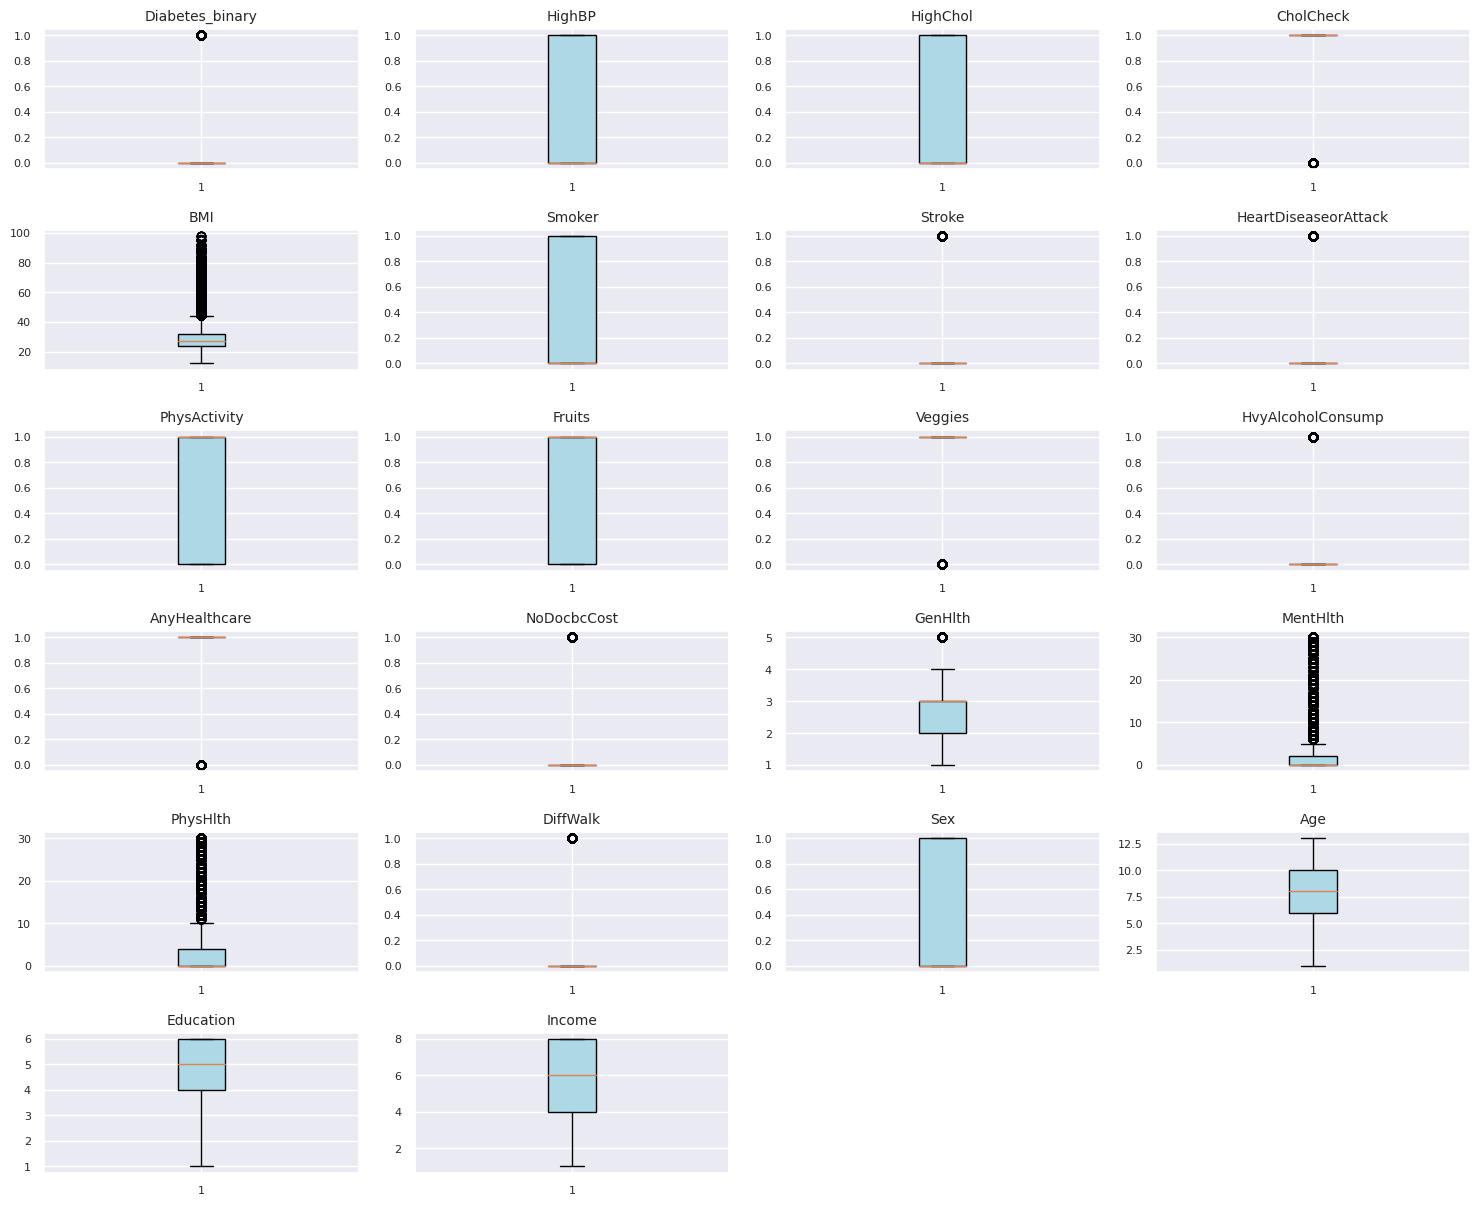

In [62]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 14))
axes = axes.flatten()
for i, col in enumerate(data.select_dtypes(include=[np.number]).columns):
    axes[i].boxplot(data[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)

for ax in axes[i+1:]:
    ax.remove()
fig.tight_layout()
plt.show()

# Handling the outliers of the BMI


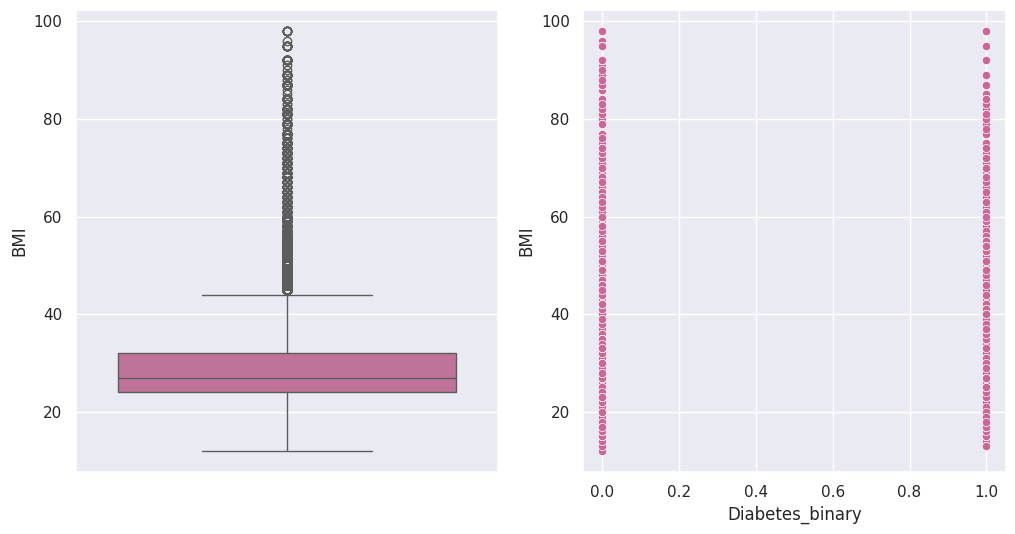

In [63]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_binary',y='BMI',color='#cc6699')
plt.show()


In [64]:
x=data[data['BMI']>=70]
x.shape

(599, 22)

In [65]:
df=data.copy()

In [66]:
df=data[data['BMI']<70]

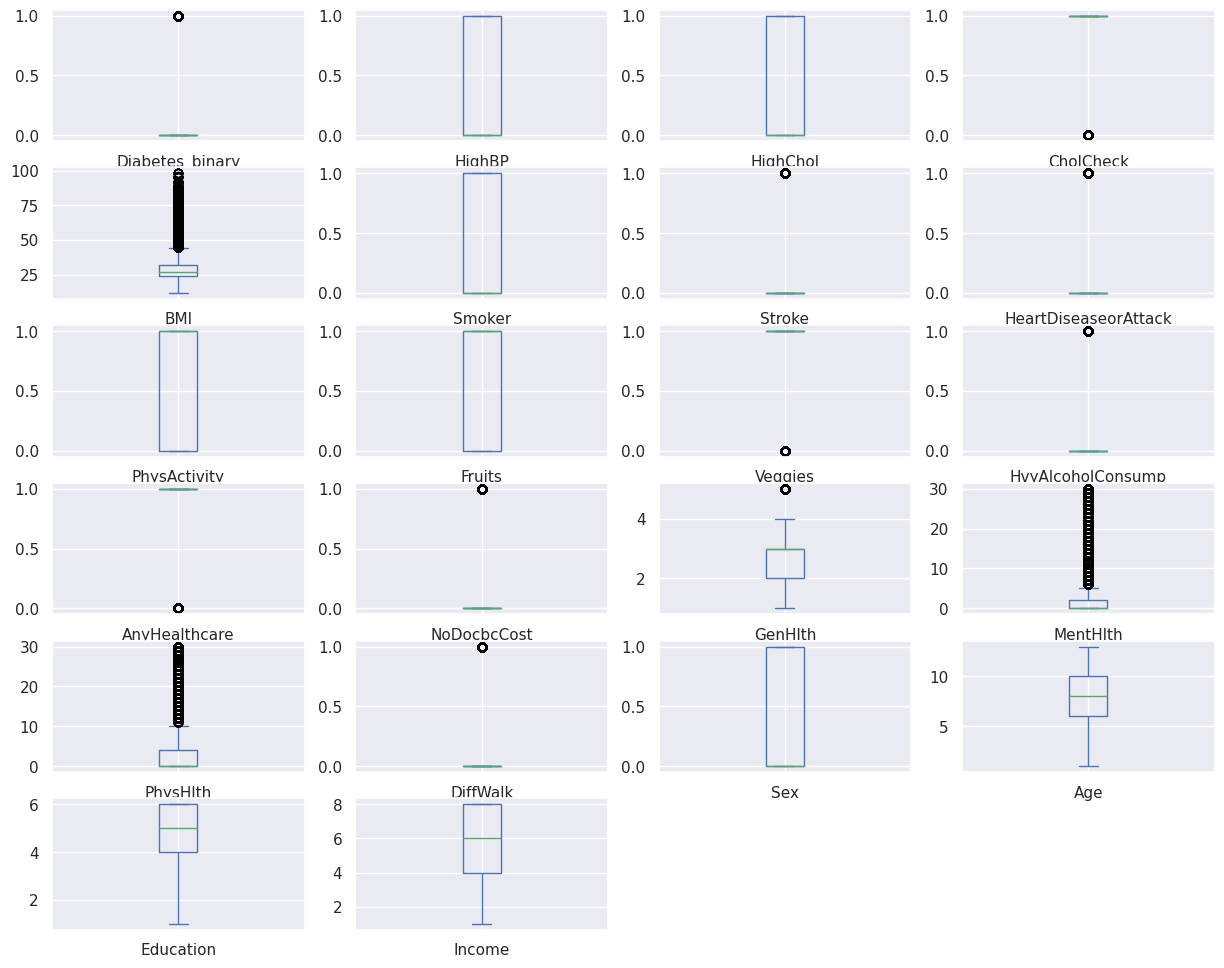

In [67]:
data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

In [68]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0    193859
1     35016
Name: count, dtype: int64

# Outlier detection

In [69]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(df)
#df['anomailes_scores']=model.decision_function(df)
df['anomaly']= model.predict(df)


In [70]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,-1
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,-1
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,-1
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,1
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,1
253676,1,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,-1
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,1
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,1


# Exclude rows including outliers


In [71]:
df[df['anomaly']==-1]


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,-1
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,-1
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,-1
6,0,1,0,1,30,1,0,0,0,0,...,0,3,0,14,0,0,9,6,7,-1
8,1,1,1,1,30,1,0,1,0,1,...,0,5,30,30,1,0,9,5,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253670,1,1,1,1,25,0,0,1,0,1,...,0,5,15,0,1,0,13,6,4,-1
253671,0,1,1,1,23,0,1,1,0,0,...,1,4,0,5,0,1,8,3,2,-1
253672,0,1,0,1,30,1,0,1,1,1,...,0,3,0,0,0,1,12,2,1,-1
253676,1,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,-1


In [72]:
df[df['anomaly']==-1].shape


(80970, 23)

In [73]:
df.drop(df[df['anomaly']==-1].index,inplace = True)


In [74]:
df.shape


(147905, 23)

In [75]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,1
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,1
5,0,1,1,1,25,1,0,0,1,1,...,0,2,0,2,0,1,10,6,8,1
7,0,1,1,1,25,1,0,0,1,0,...,0,3,0,0,1,0,11,4,4,1
9,0,0,0,1,24,0,0,0,0,0,...,0,2,0,0,0,1,8,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0,1,0,1,42,0,0,0,1,1,...,0,3,14,4,0,1,3,6,8,1
253674,0,0,0,1,27,0,0,0,0,0,...,0,1,0,0,0,0,3,6,5,1
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,1
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,1


# Drop column(anomaly)


In [76]:
df.drop(columns=['anomaly'], inplace=True)


In [77]:
df.shape


(147905, 22)

# Scaling Data


In [78]:
x = df.drop(['Diabetes_binary'],axis=1)
y = df['Diabetes_binary']

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [80]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=df.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.276159,-0.796515,0.156093,-0.135503,-0.825949,-0.088871,-0.184383,0.429193,0.697997,0.393039,...,0.129379,-0.155319,-0.272542,-0.362595,-0.370575,-0.224088,-0.870902,1.008944,-2.532043,-0.287887
1,1.276159,1.255469,0.156093,-0.695106,-0.825949,-0.088871,-0.184383,0.429193,0.697997,0.393039,...,0.129379,-0.155319,-0.272542,0.379003,-0.370575,-0.224088,-0.870902,1.008944,-0.213060,-1.458084
2,1.276159,1.255469,0.156093,-0.508572,1.210729,-0.088871,-0.184383,0.429193,0.697997,0.393039,...,0.129379,-0.155319,-0.272542,-0.362595,0.114483,-0.224088,1.148234,0.685520,0.946431,0.882310
3,1.276159,1.255469,0.156093,-0.508572,1.210729,-0.088871,-0.184383,0.429193,-1.432671,0.393039,...,0.129379,-0.155319,0.940968,-0.362595,-0.370575,4.462529,-0.870902,1.008944,-1.372552,-1.458084
4,-0.783602,-0.796515,0.156093,-0.695106,-0.825949,-0.088871,-0.184383,-2.329956,-1.432671,0.393039,...,0.129379,-0.155319,-0.272542,-0.362595,-0.370575,-0.224088,1.148234,0.038672,-1.372552,-2.043183
5,-0.783602,-0.796515,0.156093,-0.508572,1.210729,-0.088871,-0.184383,0.429193,0.697997,0.393039,...,0.129379,-0.155319,0.940968,-0.362595,-0.370575,-0.224088,1.148234,1.655793,0.946431,0.882310
6,-0.783602,-0.796515,0.156093,-0.322038,1.210729,-0.088871,-0.184383,-2.329956,-1.432671,0.393039,...,0.129379,-0.155319,0.940968,-0.362595,3.267360,-0.224088,-0.870902,-0.284752,-0.213060,0.297211
7,1.276159,-0.796515,0.156093,0.983703,-0.825949,-0.088871,-0.184383,0.429193,-1.432671,-2.544277,...,0.129379,-0.155319,-0.272542,0.873401,-0.370575,-0.224088,-0.870902,-0.608177,0.946431,0.882310
8,1.276159,1.255469,0.156093,-1.254709,-0.825949,-0.088871,-0.184383,0.429193,0.697997,0.393039,...,0.129379,-0.155319,0.940968,-0.362595,-0.370575,-0.224088,-0.870902,0.685520,-1.372552,-2.043183
9,-0.783602,-0.796515,0.156093,-0.881641,1.210729,-0.088871,-0.184383,0.429193,-1.432671,-2.544277,...,0.129379,-0.155319,-0.272542,-0.362595,-0.370575,-0.224088,1.148234,-0.284752,-0.213060,-0.287887


# Split the data

In [81]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=0, shuffle =True)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn.predict(x_test)

In [84]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0    137246
1     10659
Name: count, dtype: int64

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     48036
           1       0.27      0.09      0.13      3731

    accuracy                           0.92     51767
   macro avg       0.60      0.53      0.54     51767
weighted avg       0.88      0.92      0.90     51767



In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[47137   899]
 [ 3405   326]]


# resampling

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 32.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [1]:
!pip uninstall scikit-learn imbalanced-learn
!pip install scikit-learn imbalanced-learn


Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.4.2
Found existing installation: imbalanced-learn 0.12.2
Uninstalling imbalanced-learn-0.12.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imbalanced_learn-0.12.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imblearn/*
Proceed (Y/n)? y
  Successfully uninstalled imbalanced-learn-0.12.2
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)


In [ ]:
!pip install imbalanced-learn


In [88]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [89]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [90]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(xre_train,yre_train)

KNeighborsClassifier()

In [91]:
yre_pred = knn_smote.predict(xre_test)

In [92]:
print(classification_report(yre_test,yre_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     30664
           1       0.93      1.00      0.96     36706
           2       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96     67370
   macro avg       0.64      0.63      0.64     67370
weighted avg       0.96      0.96      0.96     67370



# Modeling


# 1.Decision tree


In [93]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_depth=40)
dt.fit(xre_train , yre_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

In [94]:
print(dt.score(xre_train , yre_train))
print(dt.score(xre_test, yre_test))

0.9999809155449249
0.941353718272228


In [95]:
y_pred_train_dt = dt.predict(xre_train)
acc_train_dt = accuracy_score(yre_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(xre_test)
acc_test_dt = accuracy_score(yre_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

0.9999809155449249
0.941353718272228


In [96]:
from sklearn.metrics import classification_report
print(classification_report(yre_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     30664
           1       0.94      0.95      0.95     36706

    accuracy                           0.94     67370
   macro avg       0.94      0.94      0.94     67370
weighted avg       0.94      0.94      0.94     67370



In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [98]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_dt,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_dt,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_dt,average="micro"))

Precision: 0.941
Recall: 0.941
F-measure: 0.941


In [177]:


from sklearn.metrics import roc_auc_score

# Assuming yre_test contains the true binary labels (for binary classification)
# Assuming y_pred_prob_dt contains the predicted probabilities for each class

# Extract probabilities for the positive class (assuming it's class 1)
y_pred_prob_dt = dt.predict_proba(xre_test)
# Assuming y_pred_prob_dt contains the predicted probabilities for each class
# Convert probabilities to binary labels
#yre_pred = np.argmax(y_pred_prob_dt, axis=1)
yre_pred=np.argmax(y_pred_prob_dt, axis=1)

# Assuming yre_test contains the true binary labels
roc_auc_score_dt = roc_auc_score(yre_test, yre_pred,multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_dt)


ROC AUC Score: 0.9401038521175209


# 2. Random Forest


In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(xre_train,yre_train)

RandomForestClassifier(max_depth=16, max_features=16)

In [101]:
print(rf.score(xre_train, yre_train))
print(rf.score(xre_test, yre_test))

0.9569200234102649
0.9443817723022117


In [102]:
y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

0.9569200234102649
0.9443817723022117


In [103]:
print(classification_report(yre_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     30664
           1       0.94      0.96      0.95     36706

    accuracy                           0.94     67370
   macro avg       0.94      0.94      0.94     67370
weighted avg       0.94      0.94      0.94     67370



In [104]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_rf,average="micro"))

Precision: 0.944
Recall: 0.944
F-measure: 0.944


In [175]:

y_pred_prob_rf = rf.predict_proba(xre_test)
yre_pred = np.argmax(y_pred_prob_rf, axis=1)

# Calculate ROC AUC score
roc_auc_score_rf = roc_auc_score(yre_test, yre_pred)
print('ROC AUC Score:', roc_auc_score_rf)


ROC AUC Score: 0.9429336856404594


# 3. XGBoost


In [106]:
xgb= XGBClassifier(max_depth=20)
xgb.fit(xre_train,yre_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [107]:
print(xgb.score(xre_train,yre_train))
print(xgb.score(xre_test, yre_test))

0.9999363851497494
0.9704170995992282


In [108]:
y_pred_train_xgb = xgb.predict(xre_train)
acc_train_xgb = accuracy_score(yre_train, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(xre_test)
acc_test_xgb = accuracy_score(yre_test, y_pred_test_xgb)
print(acc_train_xgb)
print(acc_test_xgb)

0.9999363851497494
0.9704170995992282


In [109]:
print(classification_report(yre_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     30664
           1       0.98      0.96      0.97     36706

    accuracy                           0.97     67370
   macro avg       0.97      0.97      0.97     67370
weighted avg       0.97      0.97      0.97     67370



In [110]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_xgb,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_xgb,average="micro"))

Precision: 0.970
Recall: 0.970
F-measure: 0.970


In [111]:
y_pred_prob_xgb = xgb.predict_proba(xre_test)
yre_pred_xgb = np.argmax(y_pred_prob_xgb, axis=1)

# Calculate ROC AUC score
roc_auc_score_xgb = roc_auc_score(yre_test, yre_pred_xgb)
print('ROC AUC Score:', roc_auc_score_xgb)


ROC AUC Score: 0.97114481660773


# 4. Logistic Regression


In [112]:
lg = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=100)
lg.fit(xre_train,yre_train)

LogisticRegression(random_state=100, solver='sag')

In [113]:
print(lg.score(xre_train,yre_train))
print(lg.score(xre_test, yre_test))

0.8182778187740146
0.818984711295829


In [114]:
y_pred_train_lg = lg.predict(xre_train)
acc_train_lg = accuracy_score(yre_train, y_pred_train_lg)

y_pred_test_lg = lg.predict(xre_test)
acc_test_lg = accuracy_score(yre_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

0.8182778187740146
0.818984711295829


In [115]:
print(classification_report(yre_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     30664
           1       0.82      0.86      0.84     36706

    accuracy                           0.82     67370
   macro avg       0.82      0.82      0.82     67370
weighted avg       0.82      0.82      0.82     67370



In [116]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_lg,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_lg,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_lg,average="micro"))

Precision: 0.819
Recall: 0.819
F-measure: 0.819


In [117]:
y_pred_prob_lg = lg.predict_proba(xre_test)
# Assuming y_pred_prob_lg contains the predicted probabilities for each class
# Reshape y_pred_prob_lg to a 1D array
yre_pred_prob_lg = y_pred_prob_lg[:, 1]

# Calculate ROC AUC score
roc_auc_score_lg = roc_auc_score(yre_test, yre_pred_prob_lg)
print('ROC AUC Score:', roc_auc_score_lg)


ROC AUC Score: 0.8969422290549814


# 5- kNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xre_train,yre_train)

KNeighborsClassifier(n_neighbors=4)

In [119]:
#make predictions on test set
y_pred=knn.predict(x_test)

print('Training set score: {:.4f}'.format(knn.score(xre_train,yre_train)))

print('Test set score: {:.4f}'.format(knn.score(xre_test, yre_test)))

Training set score: 0.9919
Test set score: 0.9751


In [120]:
y_pred_train_knn = knn.predict(xre_train)
acc_train_knn = accuracy_score(yre_train, y_pred_train_knn)

y_pred_test_knn= knn.predict(xre_test)
acc_test_knn = accuracy_score(yre_test, y_pred_test_knn)
print(acc_train_knn)
print(acc_test_knn)

0.9918891065930431
0.9750779278610657


In [121]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_knn,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_knn,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_knn,average="micro"))

Precision: 0.975
Recall: 0.975
F-measure: 0.975


In [122]:
y_pred_prob_knn = rf.predict_proba(xre_test)
# Assuming y_pred_prob_knn contains the predicted probabilities for each class
# Convert probabilities to binary labels
yre_pred_knn = np.argmax(y_pred_prob_knn, axis=1)

# Assuming yre_test contains the true binary labels
roc_auc_score_knn = roc_auc_score(yre_test, yre_pred_knn)
print('ROC AUC Score:', roc_auc_score_knn)


ROC AUC Score: 0.9429336856404594


In [123]:
import pickle
pickle.dump(knn, open('model.pkl','wb'))

In [124]:
model = pickle.load(open('model.pkl','rb'))

In [125]:
print(model.predict([[1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1]]))

[0]


# Extra Trees


In [126]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [127]:
etc.fit(xre_train,yre_train)

ExtraTreesClassifier()

In [128]:
yhat = etc.predict(xre_test)

In [129]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,etc.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 100.0
Test set Accuracy : 98.5646430161793


In [130]:
y_pred_prob_etc = etc.predict_proba(xre_test)
yre_pred_etc = np.argmax(y_pred_prob_etc, axis=1)

# Assuming yre_test contains the true binary labels
roc_auc_score_etc = roc_auc_score(yre_test, yre_pred_etc)
print('ROC AUC Score:', roc_auc_score_etc)

ROC AUC Score: 0.9848791720460088


In [131]:
y_pred_train_etc= etc.predict(xre_train)
acc_train_etc= accuracy_score(yre_train, y_pred_train_etc)

y_pred_test_etc= etc.predict(xre_test)
acc_test_etc = accuracy_score(yre_test, y_pred_test_etc)
print(acc_train_etc)
print(acc_test_etc)

1.0
0.9856464301617931


In [132]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_etc,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_etc,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_etc,average="micro"))

Precision: 0.986
Recall: 0.986
F-measure: 0.986


In [133]:
xre_train.shape

(157196, 21)

# LIGHT GBM


In [134]:
! pip install lightgbm

from lightgbm import LGBMClassifier
light =LGBMClassifier(max_depth=20)

In [135]:
light.fit(xre_train,yre_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 84823, number of negative: 72373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [Info] Number of data points in the train set: 157196, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.539600 -> initscore=0.158733
[LightGBM] [Info] Start training from score 0.158733


LGBMClassifier(max_depth=20)

In [136]:
yhat = light.predict(xre_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [137]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,light.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train set Accuracy : 96.28107585434745
Test set Accuracy : 96.23422888526049


In [138]:
y_pred_train_light= light.predict(xre_train)
acc_train_light= accuracy_score(yre_train, y_pred_train_light)

y_pred_test_light=light.predict(xre_test)
acc_test_light = accuracy_score(yre_test, y_pred_test_light)
print(acc_train_light)
print(acc_test_light)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.9628107585434744
0.962342288852605


In [139]:
y_pred_prob_light = light.predict_proba(xre_test)
yre_pred_light = np.argmax(y_pred_prob_light, axis=1)

# Assuming yre_test contains the true binary labels
roc_auc_score_light = roc_auc_score(yre_test, yre_pred_light)
print('ROC AUC Score:', roc_auc_score_light)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ROC AUC Score: 0.9634500784105385


In [140]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_light,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_light,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_light,average="micro"))

Precision: 0.962
Recall: 0.962
F-measure: 0.962


# Hist Gradient Boosting Classifier


In [141]:
from sklearn.ensemble import HistGradientBoostingClassifier
model2 =HistGradientBoostingClassifier()

In [142]:
model2.fit(xre_train,yre_train)

HistGradientBoostingClassifier()

In [143]:
yhat = model2.predict(xre_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,model2.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 96.38498037164696
Test set Accuracy : 96.28017761049196


In [144]:
y_pred_prob_model2 = model2.predict_proba(xre_test)
yre_pred_model= np.argmax(y_pred_prob_model2, axis=1)

# Assuming yre_test contains the true binary labels
roc_auc_score_model = roc_auc_score(yre_test, yre_pred_model)
print('ROC AUC Score:', roc_auc_score_model)

ROC AUC Score: 0.960958445819099


In [145]:
y_pred_train_model2= model2.predict(xre_train)
acc_train_model2= accuracy_score(yre_train, y_pred_train_model2)

y_pred_test_model2= model2.predict(xre_test)
acc_test_model2 = accuracy_score(yre_test, y_pred_test_model2)
print(acc_train_model2)
print(acc_test_model2)

0.9599290058271203
0.9599079709069319


In [146]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_model2,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_model2,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_model2,average="micro"))

Precision: 0.960
Recall: 0.960
F-measure: 0.960


# CATboost


In [147]:
!pip install catboost

from catboost import CatBoostClassifier
CAT =CatBoostClassifier()
CAT.fit(xre_train,yre_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.8 MB/s eta 0:00:00
Learning rate set to 0.089292
0:	learn: 0.6428412	total: 90.8ms	remaining: 1m 30s
1:	learn: 0.6012345	total: 129ms	remaining: 1m 4s
2:	learn: 0.5611629	total: 186ms	remaining: 1m 1s
3:	learn: 0.5358569	total: 227ms	remaining: 56.6s
4:	learn: 0.5025289	total: 270ms	remaining: 53.6s
5:	learn: 0.4809262	total: 314ms	remaining: 52.1s
6:	learn: 0.4650551	total: 353ms	remaining: 50.1s
7:	learn: 0.4520693	total: 396ms	remaining: 49.1s
8:	learn: 0.4333614	total: 435ms	remaining: 47.9s
9:	learn: 0.4153818	total: 478ms	remaining: 47.3s
10:	learn: 0.3933619	total: 523ms	remaining: 47s
11:	learn: 0.3783537	total: 562ms	remaining: 46.3s
12:	learn: 0.3686882	total: 608ms	remaining: 46.1s
13:	learn: 0.3534013	total: 647ms	remaining: 45.5s
14:	learn: 0.3478610	total: 699ms	remaining: 45.9s
15:	learn: 0.3370467	total: 742ms	remaining: 45.6s
16:	learn: 0.3228736	total: 780ms	remaining: 45.1s
17:	learn: 0.3123602	total: 822ms

In [148]:
CAT.fit(xre_train,yre_train)

Learning rate set to 0.089292
0:	learn: 0.6428412	total: 184ms	remaining: 3m 3s
1:	learn: 0.6012345	total: 608ms	remaining: 5m 3s
2:	learn: 0.5611629	total: 987ms	remaining: 5m 28s
3:	learn: 0.5358569	total: 1.33s	remaining: 5m 30s
4:	learn: 0.5025289	total: 1.52s	remaining: 5m 2s
5:	learn: 0.4809262	total: 1.8s	remaining: 4m 58s
6:	learn: 0.4650551	total: 1.96s	remaining: 4m 37s
7:	learn: 0.4520693	total: 2.19s	remaining: 4m 31s
8:	learn: 0.4333614	total: 2.37s	remaining: 4m 21s
9:	learn: 0.4153818	total: 2.64s	remaining: 4m 21s
10:	learn: 0.3933619	total: 2.78s	remaining: 4m 9s
11:	learn: 0.3783537	total: 2.91s	remaining: 3m 59s
12:	learn: 0.3686882	total: 3.07s	remaining: 3m 52s
13:	learn: 0.3534013	total: 3.23s	remaining: 3m 47s
14:	learn: 0.3478610	total: 3.36s	remaining: 3m 40s
15:	learn: 0.3370467	total: 3.54s	remaining: 3m 38s
16:	learn: 0.3228736	total: 3.72s	remaining: 3m 34s
17:	learn: 0.3123602	total: 3.83s	remaining: 3m 28s
18:	learn: 0.3068921	total: 3.93s	remaining: 3m 2

In [149]:
yhat = CAT.predict(xre_test)

In [150]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,CAT.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 97.21939489554443
Test set Accuracy : 96.72109247439514


In [151]:
y_pred_prob_CAT = CAT.predict_proba(xre_test)
yre_pred_CAT=np.argmax(y_pred_prob_CAT, axis=1)

# Assuming yre_test contains the true binary labels
roc_auc_score_CAT = roc_auc_score(yre_test,yre_pred_CAT)
print('ROC AUC Score:', roc_auc_score_CAT)

ROC AUC Score: 0.9684870238835462


In [152]:
y_pred_train_CAT= CAT.predict(xre_train)
acc_train_CAT = accuracy_score(yre_train, y_pred_train_CAT)

y_pred_test_CAT= CAT.predict(xre_test)
acc_test_CAT = accuracy_score(yre_test, y_pred_test_CAT)
print(acc_train_CAT)
print(acc_test_CAT)

0.9721939489554442
0.9672109247439513


In [153]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_CAT,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_CAT,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_CAT,average="micro"))

Precision: 0.967
Recall: 0.967
F-measure: 0.967


# Ada Boost


In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [155]:
ada_clf = AdaBoostClassifier( )

In [156]:
ada_clf.fit(xre_train,yre_train)

AdaBoostClassifier()

In [157]:
yhat = ada_clf.predict(xre_test)

In [158]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,ada_clf.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 88.4246418483931
Test set Accuracy : 88.39988125278315


In [159]:
y_pred_prob_ada_clf= ada_clf.predict_proba(xre_test)
# Assuming y_pred_prob_ada_clf is a 2D array where the second column represents the probability of the positive class
y_pred_prob_positive_class_ada_clf =np.argmax(y_pred_prob_ada_clf, axis=1)

# Calculate the ROC AUC score using only the probabilities for the positive class
roc_auc_score_ada_clf = roc_auc_score(yre_test, y_pred_prob_positive_class_ada_clf)

print('ROC AUC Score:', roc_auc_score_ada_clf)


ROC AUC Score: 0.8809687222985005


In [160]:
y_pred_train_ada_clf = ada_clf.predict(xre_train)
acc_train_ada_clf = accuracy_score(yre_train, y_pred_train_ada_clf)

y_pred_test_ada_clf= ada_clf.predict(xre_test)
acc_test_ada_clf = accuracy_score(yre_test, y_pred_test_ada_clf)
print(acc_train_ada_clf)
print(acc_test_ada_clf)

0.8842464184839309
0.8839988125278314


In [161]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_ada_clf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_ada_clf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_ada_clf,average="micro"))

Precision: 0.884
Recall: 0.884
F-measure: 0.884


# Bagging


In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
tree_clas = DecisionTreeClassifier(random_state=42)

In [163]:
import sklearn
print(sklearn.__version__)
help(sklearn.ensemble.BaggingClassifier)



1.4.2
Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_model, n_estimators=100, max_samples=0.8, oob_score=True, random_state=0)



In [165]:
bag_model.fit(xre_train, yre_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [166]:
y_pred_train_bag_model = bag_model.predict(xre_train)
acc_train_bag_model = accuracy_score(yre_train, y_pred_train_bag_model)

y_pred_test_bag_model = bag_model.predict(xre_test)
acc_test_bag_model = accuracy_score(yre_test, y_pred_test_bag_model)
print(acc_train_bag_model)
print(acc_test_bag_model)

0.9994401893177943
0.9662015734006234


In [167]:
bag_model.oob_score_

0.9643184304944146

In [178]:
y_pred_prob_bag_model = bag_model.predict_proba(xre_test)
y_pred_prob_bag=np.argmax(y_pred_prob_bag_model, axis=1)
roc_auc_score_bag_model = roc_auc_score(yre_test, y_pred_prob_bag, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_bag_model)

ROC AUC Score: 0.9665515553466926


In [169]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_bag_model,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_bag_model,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_bag_model,average="micro"))

Precision: 0.966
Recall: 0.966
F-measure: 0.966
